<a href="https://colab.research.google.com/github/danielriosgarza/hungerGamesModel/blob/main/notebooks/allFigsManuscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start here

First obtain the GitHub repository

In [ ]:
!git clone https://github.com/danielriosgarza/hungerGamesModel

fatal: destination path 'hungerGamesModel' already exists and is not an empty directory.


cd into the directory containing code to reproduce the manuscript's Figures

In [ ]:

%cd hungerGamesModel/scripts/FiguresReproduce/
!ls

/content/hungerGamesModel/scripts/FiguresReproduce
Figure1_barCharts.py			    Figure3_dilutionRate.py	   Figure3_pH_5_60.py
Figure1_dynamicPlots.py			    Figure3_miniReactorHeatMap.py  Figure3_pH.py
Figure2_contourPlots.py			    Figure3_PCA_animation.py	   figure4_3_species.py
Figure3_dilution_rate_0_39.py		    Figure3_pH_5_47.py		   figure4_50_species.py
Figure3_dilution_rate_0_41_perturbation.py  Figure3_pH_5_50.py
Figure3_dilution_rate_0_41.py		    Figure3_pH_5_60_5_47.py


# Introduction

This notebook accompanies the study **"Phenotype switching explains the emergence of alternative stable states in a gut microbial community"** by Garza, Liu, Van der Velde et al. (2024) and is aimed to help users reproduce our model, simulate and explore our experimental data, and reproduce all the Figures in the manuscript.

## Prerequisites
Besides downloading the GitHub repository,  certify that your Python environment has all the necessary modules, below is a list of modules that were used in the study and their versions.

| Package      | Version | already in colab |
|--------------|---------|------------------|
| aquarel      | 0.0.5   | no               |
| cmasher      | 1.6.3   | no               |
| cobra        | 0.29.0  | no               |
| gurobi       | 11.0.0  | no               |
| lmfit        | 1.2.2   | no               |
| matplotlib   | 3.8.1   | yes              |
| numpy        | 1.24.3  | yes              |
| pandas       | 2.1.3   | yes              |
| plotly       | 5.18.0  | yes              |
| pony         | 0.7.17  | no               |
| scikit-learn | 1.3.0   | yes              |
| scipy        | 1.11.3  | yes              |
| sdeint       | 0.3.0   | no               |
| seaborn      | 0.12.2  | yes              |
| sqlite3      | 3.41.2  | yes              |
| tqdm         | 4.65.0  | yes              |
| umap-learn   | 0.5.4   | no               |

\\

Notice that it is not possible to stably use a Gurobi license in this Colab notebook. In this case, Gurobi is automatically replaced by its free alternative, pyglpk. In a local conda environment, this might need to be set manually.

In [ ]:
#install the requirements that are not in colab

!pip install aquarel
!pip install cmasher
!pip install cobra
!pip install lmfit
!pip install pony
!pip install sdeint
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.3/533.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 961.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2

# Gene expression bar charts

Figure 1 A, B, C show nine fold-change comparisons of metabolic genes between growth stages. To reproduce exactly all nine Figures, run the following [script](https://github.com/danielriosgarza/hungerGamesModel/blob/main/scripts/FiguresReproduce/Figure1_barCharts.py).

In this notebook, we will explain all the steps needed to generate the first bar chart depicting the changes in metabolic gene expression of *Blautia hydrogenotrophica* between the 14 and 32 hours. The other plots, available in the script mentioned above, are generated in an analogous way.   

### Background information

The genome-scale metabolic models from were reactions and genes were extracted are available in the links below:
- [*Blautia hydrogenotrophica* (GSMM)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/bh/gsmms/bh_final.xml)
- [*Bacteroides thetaiotaomicron* (GSMM)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/bt/gsmms/bt_final.xml)
- [*Roseburia intestinalis* (GSMM)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/ri/gsmms/ri_final.xml)

These are complete semi-curated genome-scale metabolic models that can be simulated with FBA.

The genome feature annotations that we used to map genes are available here:

- [*Blautia hydrogenotrophica* (gene features)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/bh/genes/bh_BVBRC_features.txt)
- [*Bacteroides thetaiotaomicron* (gene features)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/bt/genes/bt_BVBRC_genome_feature.txt)
- [*Roseburia intestinalis* (gene features)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/ri/genes/ri_BVBRC_genome_feature.txt)

The TPM files are available here:

- [*Blautia hydrogenotrophica* (core metabolism)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/bh/genes/bh_tpm.txt)
- [*Bacteroides thetaiotaomicron* (core metabolism)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/bt/genes/bt_tpm.txt)
- [*Roseburia intestinalis* (core metabolism)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/ri/genes/ri_tpm.txt)

First we import the packages that are needed to manipulate files and generate the Figures

In [ ]:
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
from aquarel import load_theme
theme = load_theme("minimal_light")
theme.apply()
import logging
logging.getLogger('matplotlib.font_manager').disabled = True


Next we set the path and import import the class and functions that are needed to manipulate gene expression data and genome-scale metabolic models. These are located [here](https://github.com/danielriosgarza/hungerGamesModel/blob/main/scripts/geneExpression/parseGenExpData.py).

We also define the paths that contain gene names and gene expression files, in our example for *Blautia hydrogenotrophica*, the metabolic model, and where we want to store figures.

In [ ]:
project_root = Path(os.getcwd()).parents[0]
sys.path.append(os.path.join(project_root, 'geneExpression'))
from parseGenExpData import *

#for Bacteroides thetaiotaomicron or Roseburia intestinalis, replace 'bh' with 'bt' or 'ri', respectively
geneFolder = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bh', 'genes')
modelFolder = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bh', 'gsmms')
figuresFolder = os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'bhExperiments')

#load the GSMM
model = cobra.io.read_sbml_model(os.path.join(modelFolder, 'bh_final.xml'))

We now create an instance of the "GeneExpr" class, which takes as input a transcript per million (tpm) file, group labels, their indices in thes files, and the deseq2 output comparing our groups. It also requires the gene feature files, the genome-scale metabolic model object, and the species label ('bh', 'bt', or 'ri'). This instance contains information and comparison for all genes and metabolic reactions, not only the core ones that will be shown in the figure.

In [ ]:
#load the gene expression class
bhGE = GeneExpr(geneFolder = geneFolder,
                tpmFile = 'bh_tpm.txt',
                groupLabels = ['t14', 't32', 't72', 't32 and t72'],
                groupIDX = [[4,5,6],
                            [7,8,9],
                            [10,11,12],
                            [7,8,9,10,11,12]
                            ],
                groupComparison = {('t14', 't32'):'t14vst32_deseq.txt',
                                   ('t14', 't72'): 't14vst72_deseq.txt',
                                   ('t32', 't72'): 't32vst72_deseq.txt'},
                featuresFile =  'bh_BVBRC_features.txt',
                sbmlModel = model,
                species='bh'
                )

Next we extract the reactions from the core metabolism, sort them, and rename them to their simple gene/reaction symbols  

In [ ]:
#########################t14 vs 32 #########################
gA = 't14'
gB = 't32'

reactionList = []

with open(os.path.join(geneFolder, 'wcReactions.txt')) as f:
    for line in f:
        reactionList.append(line.strip())

reactionList = np.array(reactionList)
group = (gA, gB)

x,p,g = extracReactions(bhGE, reactionList, group)
sorter = np.argsort(x)

x = x[sorter]
g = g[sorter]
reactionList = reactionList[sorter]
p = p[sorter]

labels = reactionList.copy()

#Change labels for better readability
labels[labels=='CODH_ACS'] = 'CODH'
labels[labels=='OOR2r'] = 'OOR2'
labels[labels=='OOR2r'] = 'OOR2'
labels[labels=='PFK(ppi)'] = 'PFK'
labels[labels=='HYDFDNrfdx'] = 'HydABC'
labels[labels=='GLUt2r'] = 'GLUt'
labels[labels=='Rnf'] = 'RNF'
labels[labels=='LDH_L'] = 'LDH'
labels[labels=='LDH_L'] = 'LDH'

Finally, we make the chart using matplotlib

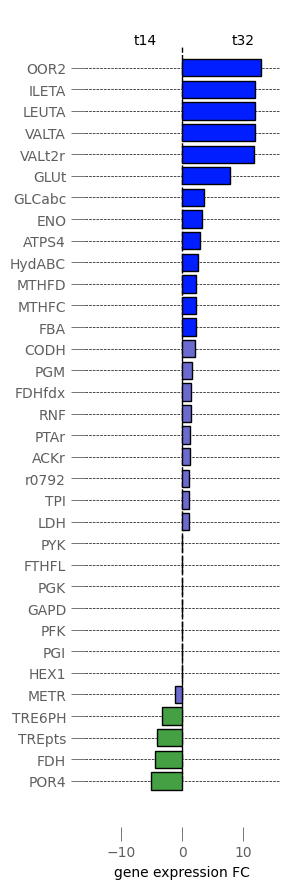

In [ ]:
#all colors
c= np.array(['#6B6ACF']*len(x))

#differentially expressed colors
c[(p < 0.01) & (x > 0)] = '#001eff'

c[(p < 0.01) & (x < 0)] = '#44A043'

plt.rcParams["figure.figsize"] = (3 ,9)
fig, ax = plt.subplots()
ax.vlines(0,0, len(x), color = 'k', lw=1, ls='--')
ax.barh(y = np.arange(len(x)), width = x, color=c, edgecolor='k', zorder=5)
fcRange = 16
ax.hlines(np.arange(len(x)),-fcRange, fcRange, color = 'k', lw=.5, ls='--')
ax.set_yticks(np.arange(len(x)), labels=labels, fontsize=10)
ax.set_xlim(-fcRange, fcRange)
ax.set_xlabel('gene expression FC')
ax.text(-fcRange/2, len(x) + .1, gA)
ax.text(fcRange/2, len(x) + .1, gB)
plt.rcParams["figure.figsize"] = (3 ,9)
plt.tight_layout()

#Uncomment to save the figure:
#plt.savefig(os.path.join(figuresFolder,  'geneExp_' + gA + 'vs' + gB + '.png'), dpi = 300)

plt.show()

# Monoculture kinetics and model simulations

Next we illustrate how to generate the plots in Figure 1 D, E, and F, which depict moculture kinetics for cells, pH, and metabolites, in three independent experiments each with 3-6 biological replicates. These kinetics are overlayed with model simulations, which are generated from the same initial conditions.

To generate all 22 plots, run the [script.](https://github.com/danielriosgarza/hungerGamesModel/blob/main/scripts/FiguresReproduce/Figure1_dynamicPlots.py)

As we did above, we will explain how to generate the plots for *Blautia hydrogenotrophica*. The others are analogous and can be reproduced with the above script.

### Background information

For the generic concept of the model, its main equations, and the procedure used to fit data, refer to the manuscript's supplementary text S1.

For a guideline and overview of the computational implementation, refer to the [wiki](https://github.com/danielriosgarza/hungerGamesModel/wiki/Computational-setup). Also, refer to the [wiki](https://github.com/danielriosgarza/hungerGamesModel/wiki/Experiments) for an overview of the experimental datasets.

As explained in the wiki, the model structure is derived from a relational database, which is a convenient way to maintain the simulations structured and easily relate model components computationally. The database file used in all our simulations is available [here](https://github.com/danielriosgarza/hungerGamesModel/wiki/Experiments). Addiionally, the exact fitted model parameters that were used are available:

- [*Blautia hydrogenotrophica* (model paramters)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/params/bh.tsv)
- [*Bacteroides thetaiotaomicron* (model parameters)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/params/btri.tsv)
- [*Roseburia intestinalis* (model parameters)](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/params/btri.tsv)

The initial conditions used in all simulations are the experimental values obtained at time zero. Plots and descriptions of were to find the raw experimental values are available [here](https://github.com/danielriosgarza/hungerGamesModel/wiki/Experiments).

First, import the modules that are needed to manipulate files, parse data, and make plots:

In [ ]:
import os
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

Next, append the folder “compare2experiments” to our path and import the functions from the scripts "parseTable" and "general". These scripts contain auxiliary functions to locate the experimental data, parse replicates, extract initial values, simulate models with these values, and make plots for different states.

In [ ]:
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], 'compare2experiments'))
from parseTable import *
from general import *

Next, we define the species (from the options “bh”, “bt”, or “ri”) and the experiment groups we want to plot and give them labels and colors. The experiment groups are reference to independent experiments with biological replicates that in Figure 1 are labeled as “experiment 1”, “experiment 2”, and “experiment 3”.

We also load the model parameters for *Blautia hydrogenotrophica*, the model’s database files. We create a database connection and load the parameters to the database.

In [ ]:
species = 'bh'
experiments = ['bhbt', 'bhri', 'bhbtri']
labels = ['bh1', 'bh2', 'bh3']
colors = ['#00ff26', '#003eff', '#ff0000']
params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
databaseName = 'modelDB_bhbtri.sqlite3'
databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')
database = os.path.join(databaseFolder, databaseName)
conn = create_connection(os.path.join(databaseFolder, databaseName))
assignBhParams(params, conn)

Now we select the measured states from which we want to extract initial conditions and perform model simulations for each experiment using the “simulateExperiment” function that is already loaded in our environment. This will load the database that we set with parameters, load the initial values for the state variables, and perform simulations within the experiment times. The simulations are stored in our model objects (which we call "bh1", "bh2", and "bh3" for simulations with the conditions in each one of three experiments).

In [ ]:
#states to get the initial conditions
measuredStates = ['live',
                  'trehalose',
                  'pyruvate',
                  'glucose',
                  'lactate',
                  'acetate']
#simulate experiment 1 labeled as "bhbt"
bh1 = simulateExperiment(group = 'bh',
                       experimentLabel = 'bhbt',
                       dbPath = database,
                       measuredStates = measuredStates,
                       )
#simulate experiment 2 labeled as "bhri"
bh2 = simulateExperiment(group = 'bh',
                       experimentLabel = 'bhri',
                       dbPath = database,
                       measuredStates = measuredStates
                       )
#simulate experiment 3 labeled as "bhbtri"
bh3 = simulateExperiment(group = 'bh',
                       experimentLabel = 'bhbtri',
                       dbPath = database,
                       measuredStates = measuredStates
                       )

We select the states to make experiment/simulation Figures. Also define their types between the alternatives “cells”, “metabolite”, and “pH”. We then plot their kinetics using the “makeExperimentPlot” function, which uses the simulation objects obtained above (bh1, bh2, and bh3) to get simulated data in addition to the experimental data. If simulated data are not provided, only the experimental points will be ploted.

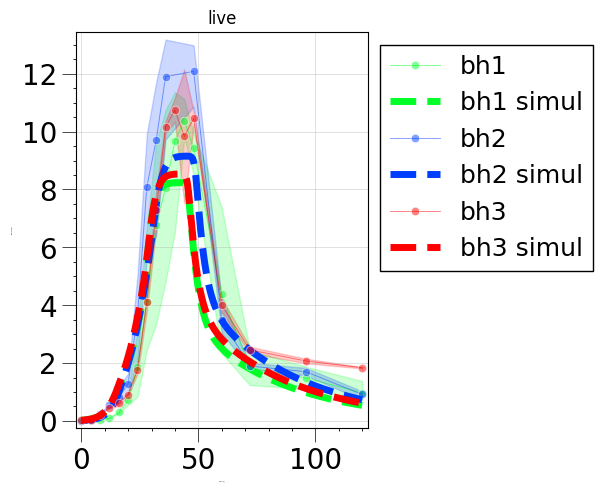

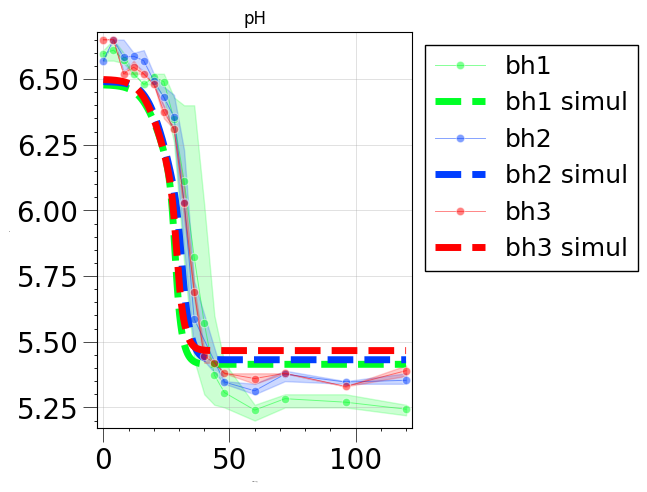

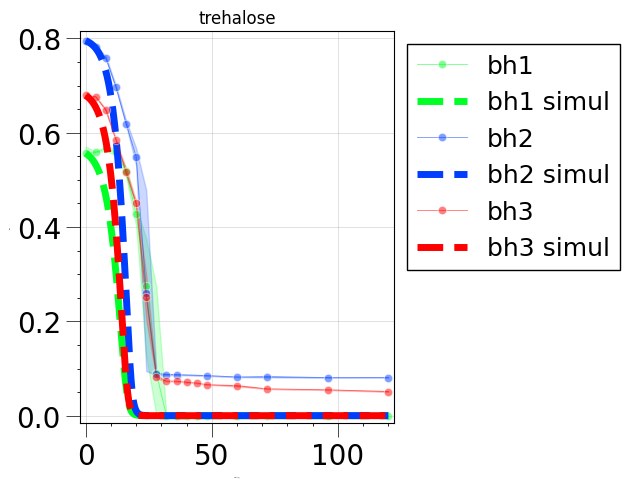

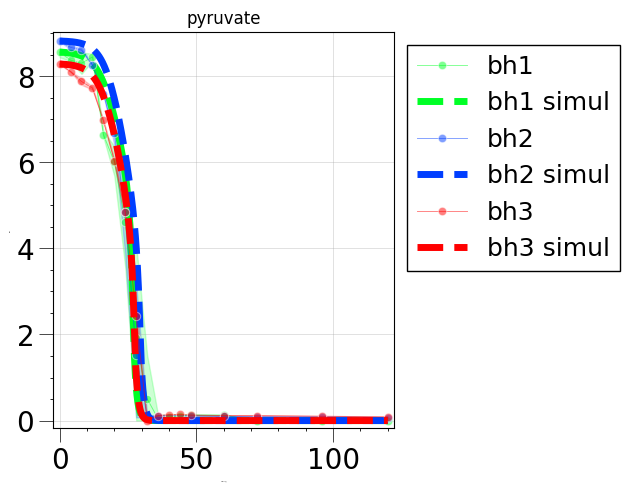

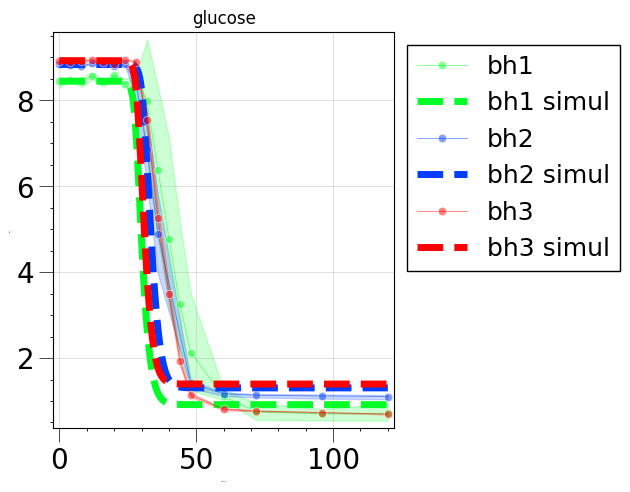

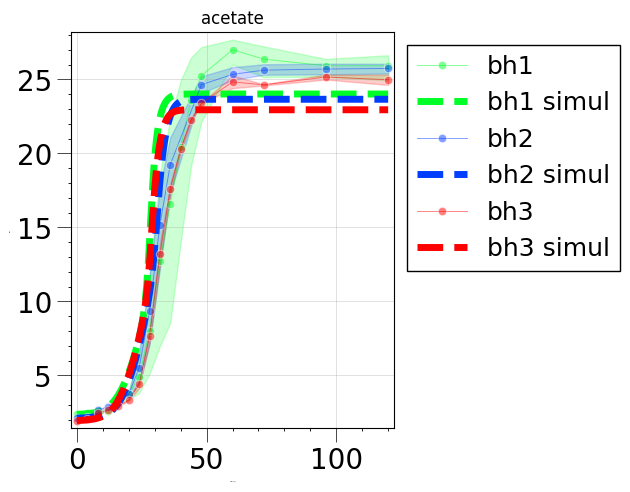

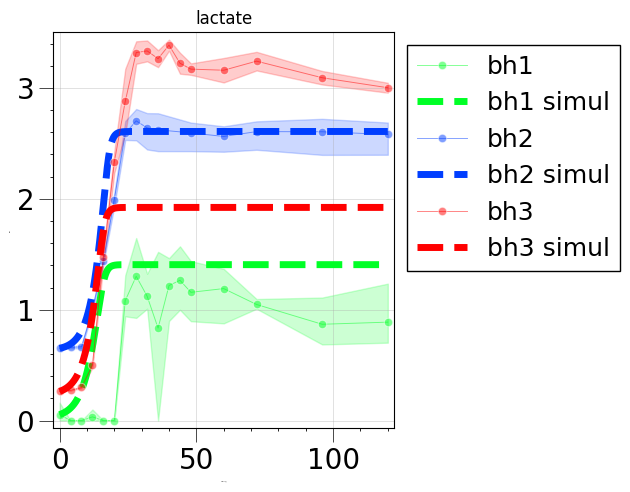

In [ ]:
states = ['live',
          'pH',
          'trehalose',
          'pyruvate',
          'glucose',
          'acetate',
          'lactate']

stTypes = ['cells',
           'pH',
           'metabolite',
           'metabolite',
           'metabolite',
           'metabolite',
           'metabolite']

figPath = os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', species+'Experiments')

for i,v in enumerate(states):
    makeExperimentPlot(species, v, stTypes[i], experiments, labels, colors, simulObj = [bh1, bh2, bh3], alpha=0.5, legend=True)
    plt.title(v)
    plt.savefig(os.path.join(figPath, v + 'model.png'), dpi = 300)
    plt.show()

# Contour plots showing the stability landscape under pH and dilution rate gradients

Next we illustrate how to generate the plots in Figure 2 B and C. The exact plots in the Figures can be generated with the [script.](https://github.com/danielriosgarza/hungerGamesModel/blob/main/scripts/FiguresReproduce/Figure2_contourPlots.py), the manuscript plots contain 10000 steady state simulations (100 pHs x 100 dilution rates), which take several hours to be completed. Therefore, we illustrate them using only 25 steady-states (five pHs x five dilution rates).

### Setup

Before runing the main nested loop we need to setup the environment and write some auxiliary functions for the pH and discrete composition plot. But before, as we did with the previous Figures, we load the modules and scripts.




In [ ]:
from pathlib import Path
import os
import sys
import plotly.io as pio
from matplotlib.colors import ListedColormap
import cmasher as cmr
from tqdm import tqdm

sys.path.append(os.path.join(Path(os.getcwd()).parents[0], 'db'))
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], 'compare2experiments'))

from readModelDB import *
from mainClasses import *
from loadParameters import *
from general import *

Now we write a function to take a species composition vector, binarize it if the species is present or absent and return a specific integer if one, two, or the three of the species coexist.

In [ ]:
def getComposition(compVec):
    rounded_comp = np.round(compVec, 5) #round to five sig digits
    binary_comp = np.where(rounded_comp > 0, 1, 0) #binarize

    # Convert array to a tuple of its elements
    binary_comp_tuple = tuple(binary_comp.tolist())

    composition_dict = {
        (1, 0, 0): 1,#bh
        (0, 1, 0): 2,#bt
        (0, 0, 1): 3,#ri
        (1, 0, 1): 4,#bh, ri
        (1, 1, 0): 5,#bh, bt
        (0, 1, 1): 6,#bt, ri
        (1, 1, 1): 7,#bh, bt, ri
    }

    return composition_dict.get(binary_comp_tuple, 0)

Next we write functions to make two types of contour plots, one for continuous and one for discrete data.

In [ ]:
def makeContour(x, y, z, xlabel, ylabel, title, vmin = 0, vmax = 1, cbar=False, cmap = 'cmr.lavender'):
    cmap = cmap
    cmap = plt.get_cmap(cmap)   # MPL
    xd, yd = np.meshgrid(x, y)
    zd = np.array(z).reshape(len(x), len(y))

    # Create a contour plot
    plt.figure(figsize=(5, 5))
    contour = plt.contourf(xd, yd, zd, cmap=cmap, vmin = vmin, vmax = vmax)

    # Add colorbar and set fontsize
    if cbar:
        colorbar = plt.colorbar(contour)
        colorbar.ax.tick_params(labelsize=14)  # Set the fontsize for colorbar labels

    # Add labels and title
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    # plt.title(title)

    # Show the plot
    plt.tight_layout()
    if title is not None:
        plt.savefig(os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'contours', title),transparent=True, dpi=600)
    plt.show()

def makeDiscreteContour(x, y, z, xlabel, ylabel, title):
    # Define colors for 0, a placeholder for 1, and then 2-7
    custom_colors = ['#121313',  # Color for 0
                     '#121313',  # Placeholder color for 1 (not in data)
                     '#ff8300',  # Color for 2
                     '#00B8FF',  # Color for 3
                     '#984ea3',  # Color for 4
                     '#e41a1c',  # Color for 5
                     '#377eb8',  # Color for 6
                     '#4daf4a']  # Color for 7
    custom_cmap = ListedColormap(custom_colors)

    xd, yd = np.meshgrid(x, y)
    zd = np.array(z).reshape(len(x), len(y))

    plt.figure(figsize=(5, 5))
    # Levels covering 0 to 7 (including placeholder for 1)
    levels = np.arange(-0.5, 8.5, 1)
    contour = plt.contourf(xd, yd, zd, levels=levels, cmap=custom_cmap, extend='both')
    cbar = plt.colorbar(contour, ticks=np.arange(0, 8))  # Ticks for 0 to 7

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    plt.tight_layout()
    if title is not None:
        plt.savefig(os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'contours', title + '.png'), transparent=True, dpi=600)
    plt.show()

As explained in the [wiki](https://) and in the [supplementary text S1](https://), the pH is modeled as a function of the metabolite concentration in the medium. In most of our analysis and experiments, the pH is an emergent state. However to tease out the effect of pH in our system, we can also hold it constant. In this case it exerts an effect in the growth of bacterial subpopulations but does not change during growth. For this purpose, we define a mock pH function that returns a constant valued pH function.

In [ ]:
def mockpHfunc(metObj, pH=7.0):
    def pHfunc(metObj):
        return pH
    return pHfunc

Now we difine a function that performs simulations and returns the final states. This fuction takes a pH value (if left as "None", the pH is treated as an emergent state) and a dilution factor. This dilution factor is a volume that is replaced per time unit (later converted into a dilution rate). The function returns the states for the first  (t=0h) and last simulation points (t=600h)

In [ ]:
def makeSimulation(pHControl = None,
                   dilutionFactor = 0.5,
                   bh = 0.0,
                   bt = 0.01,
                   ri = 0.01):

    #pH profile
    ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')
    databaseName = 'modelDB_bhbtri.sqlite3'
    databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

    #update database with parameters from a file
    ##########################################

    #create a database connection
    conn = create_connection(os.path.join(databaseFolder, databaseName))

    #load the parameter file (parameter files are located at "/files/params" )
    bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
    bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
    ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


    #assign these parameters (depending on the strain, use the specific function)
    assignBhParams(bh_params, conn)
    assignBtParams(bt_params, conn)
    assignRiParams(ri_params, conn)

    #Load database
    db = get_database(os.path.join(databaseFolder, databaseName))

    #getStarting pH
    wc = createMetabolome(db, 'wc')

    if pHControl is None:
        predictpH = getpH(wc.metabolites, ipH_path)
    else:
        predictpH = mockpHfunc(wc.metabolites,pH=pHControl)

    pH =  predictpH(wc.get_concentration())

    #get the feed media and the reactor media
    wc_feed = createMetabolome(db, 'wc', pH, pHFunc=predictpH)
    wc_reactor = createMetabolome(db, 'wc', pH, pHFunc=predictpH)

    #get the feed obj. Make it sterile
    feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
    feed_microbiome.subpopD['xa'].count = 0
    feed_microbiome.subpopD['xe'].count = 0
    feed_microbiome.subpopD['xi'].count = 0

    #create the reactor obj, with starting populations
    reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
    reactor_microbiome.subpopD['xa'].count = bh
    reactor_microbiome.subpopD['xe'].count = bt
    reactor_microbiome.subpopD['xi'].count = ri
    batchA = Pulse(wc_feed, feed_microbiome, 0, 6000, 100, 0, 0, dilutionFactor,dilutionFactor)

    #simulate
    reactor = Reactor(reactor_microbiome, wc_reactor,[
                                                  batchA
                                                   ], 15)
    reactor.simulate()
    b = reactor.cellActive_dyn.T[-1]
    bac_composition = b
    pyru = reactor.met_simul[reactor.metabolome.metabolites.index('pyruvate')]
    gluc = reactor.met_simul[reactor.metabolome.metabolites.index('glucose')]
    treh = reactor.met_simul[reactor.metabolome.metabolites.index('trehalose')]
    mann = reactor.met_simul[reactor.metabolome.metabolites.index('mannose')]
    acet = reactor.met_simul[reactor.metabolome.metabolites.index('acetate')]
    form = reactor.met_simul[reactor.metabolome.metabolites.index('formate')]
    lact = reactor.met_simul[reactor.metabolome.metabolites.index('lactate')]
    succ = reactor.met_simul[reactor.metabolome.metabolites.index('succinate')]
    buty = reactor.met_simul[reactor.metabolome.metabolites.index('butyrate')]

    metsA = np.array([pyru[0],
        gluc[0],
        treh[0],
        mann[0],
        acet[0],
        lact[0],
        form[0],
        succ[0],
        buty[0]
        ])
    metsB = np.array([pyru[-1],
        gluc[-1],
        treh[-1],
        mann[-1],
        acet[-1],
        lact[-1],
        form[-1],
        succ[-1],
        buty[-1]
        ])
    pH = reactor.pH_simul[-1]
    return bac_composition,metsA,metsB, pH


Now we perform a nested simulation for pH and dilution factors

In [ ]:
pH_points = np.linspace(5,7.0,5)
dilution_rate_points = np.linspace(0,3,5)
bhbtri2_mA = []
bhbtri2_mB = []
bhbtri2_b = []

for ph in tqdm(pH_points):
    for d in tqdm(dilution_rate_points):
      bac, metA, metB,_ = makeSimulation(pHControl=ph,
                                       dilutionFactor=d,
                                       bh = 0.003,
                                       bt = 0.003,
                                       ri = 0.003)
      bhbtri2_b.append(bac)
      bhbtri2_mA.append(metA)
      bhbtri2_mB.append(metB)

 80%|████████  | 4/5 [18:08<04:40, 280.20s/it]


Now we can generate the coarse contour plots (with 25 insteade of 10000 resolution ponts), which we divide by their maximum values so that colors are comparable.

In [ ]:
pH_points = np.linspace(5,7.0,5)
dilution_rate_points = np.linspace(0,3,5)/15

bh_bhbtri = np.array([i[0] for i in bhbtri2_b])
bh_bhbtri = bh_bhbtri/np.max(bh_bhbtri)
print("Blautia hydrogenotrophica")
makeContour(dilution_rate_points,
            pH_points,
            bh_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'bh_bhbtri.png'
            )
bt_bhbtri = np.array([i[1] for i in bhbtri2_b])
bt_bhbtri = bt_bhbtri/np.max(bt_bhbtri)
print("Bacteroides thetaiotomicron")
makeContour(dilution_rate_points,
            pH_points,
            bt_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'bt_bhbtri.png'
            )

ri_bhbtri = np.array([i[2] for i in bhbtri2_b])
ri_bhbtri = ri_bhbtri/np.max(ri_bhbtri)
print("Roseburia intestinalis")
makeContour(dilution_rate_points,
            pH_points,
            ri_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'ri_bhbtri.png'
            )

pyru_bhbtri = np.array([i[0] for i in bhbtri2_mB])
gluc_bhbtri = np.array([i[1] for i in bhbtri2_mB])
treh_bhbtri = np.array([i[2] for i in bhbtri2_mB])
acet_bhbtri = np.array([i[4] for i in bhbtri2_mB])
lact_bhbtri = np.array([i[6] for i in bhbtri2_mB])
succ_bhbtri = np.array([i[7] for i in bhbtri2_mB])
buty_bhbtri = np.array([i[8] for i in bhbtri2_mB])

comp = np.array([getComposition(i) for i in bhbtri2_b])
print("Composition")
makeDiscreteContour(dilution_rate_points,
            pH_points,
            comp,
            'dilution rate ($h^{-1}$)',
            'pH',
            'coexistence_bhbtri2.png')
pyru_bhbtri = pyru_bhbtri/np.max(pyru_bhbtri)
print("pruvate")
makeContour(dilution_rate_points,
            pH_points,
            pyru_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'pyruvate_bhbtri.png'
            )
gluc_bhbtri = gluc_bhbtri/np.max(gluc_bhbtri)
print("glucose")
makeContour(dilution_rate_points,
            pH_points,
            gluc_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'glucose_bhbtri.png'
            )
treh_bhbtri = treh_bhbtri/np.max(treh_bhbtri)
print("trehalose")
makeContour(dilution_rate_points,
            pH_points,
            treh_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'trehalose_bhbtri.png'
            )

acet_bhbtri = acet_bhbtri/np.max(acet_bhbtri)
print("acetate")
makeContour(dilution_rate_points,
            pH_points,
            acet_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'acetate_bhbtri.png'
            )
lact_bhbtri = lact_bhbtri/np.max(lact_bhbtri)
print("lactate")
makeContour(dilution_rate_points,
            pH_points,
            lact_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'lactate_bhbtri.png'
            )
succ_bhbtri = succ_bhbtri/np.max(succ_bhbtri)
print("succinate")
makeContour(dilution_rate_points,
            pH_points,
            succ_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'succinate_bhbtri.png'
            )
buty_bhbtri = buty_bhbtri/np.max(buty_bhbtri)
print("butyrate")

makeContour(dilution_rate_points,
            pH_points,
            buty_bhbtri,
            'dilution rate ($h^{-1}$)',
            'pH',
            'butyrate_bhbtri_cbar.png',
            cbar=True
            )


#Tipping points driven by the dilution rate

Next, we will use the "makeSimulation" function to explore the steady state values in a dilution rate gradient as depicted in Figure 3A. In the manuscript we sweep 150 dilution rate values. For computation purposes, here we will sweep only ten. The script used to generate the manuscript's Figure is availble [here.](https://github.com/danielriosgarza/hungerGamesModel/blob/main/scripts/FiguresReproduce/Figure3_dilutionRate.py)  

First, we will write a function to generate the heatmap with the results.

In [ ]:
def create_heatmap(data, row_labels, x_positions, x_values, xlabel, ylabel, title, fileName = None):
    fig, ax = plt.subplots()
    heatmap = ax.imshow(data, aspect='auto')
    ax.grid(False)

    # Set row labels (y-axis)
    ax.set_yticks(np.arange(data.shape[0]))

    yticklabels = ax.set_yticklabels(row_labels)
    yticklabels[-1].set_fontstyle('italic')
    yticklabels[-2].set_fontstyle('italic')
    yticklabels[-3].set_fontstyle('italic')

    # Set specific x-ticks and labels (x-axis)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_values)

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Add grid
    ax.set_xticks(np.arange(-.5, data.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, data.shape[0], 1), minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    # Add colorbar
    cbar = ax.figure.colorbar(heatmap, ax=ax)
    plt.tight_layout()

    if fileName is not None:
        plt.savefig(fileName, transparent=True, dpi=600)

    plt.show()

Now we make iterations, store the steady-state values in matrix and generate the heatmap.

In [ ]:
# iterate and store the results
simulation_points = 10 #150 were used in the manuscript
dilution_rate_points = np.linspace(0,3,simulation_points)

bhbtri2_mA = []
bhbtri2_mB = []
bhbtri2_b = []
bhbtri2_pH = []

for d in tqdm(dilution_rate_points):
    bac, metA, metB, pH = makeSimulation(pHControl=None,
                                      dilutionFactor=d,
                                      bh = 0.003,
                                      bt = 0.003,
                                      ri = 0.003)
    bhbtri2_b.append(bac)
    bhbtri2_mA.append(metA)
    bhbtri2_mB.append(metB)
    bhbtri2_pH.append(pH)


#generate the data matrix
bh_bhbtri = np.array([i[0] for i in bhbtri2_b])
bt_bhbtri = np.array([i[1] for i in bhbtri2_b])
ri_bhbtri = np.array([i[2] for i in bhbtri2_b])

pyru_bhbtri = np.array([i[0] for i in bhbtri2_mB])
gluc_bhbtri = np.array([i[1] for i in bhbtri2_mB])
treh_bhbtri = np.array([i[2] for i in bhbtri2_mB])
mann_bhbtri = np.array([i[3] for i in bhbtri2_mB])
acet_bhbtri = np.array([i[4] for i in bhbtri2_mB])
lact_bhbtri = np.array([i[5] for i in bhbtri2_mB])
form_bhbtri = np.array([i[6] for i in bhbtri2_mB])
succ_bhbtri = np.array([i[7] for i in bhbtri2_mB])
buty_bhbtri = np.array([i[8] for i in bhbtri2_mB])

pH_bhbtri = np.array(bhbtri2_pH)


dataM = np.array([pyru_bhbtri,
                  gluc_bhbtri,
                  treh_bhbtri,
                  mann_bhbtri,
                  acet_bhbtri,
                  lact_bhbtri,
                  form_bhbtri,
                  succ_bhbtri,
                  buty_bhbtri,
                  pH_bhbtri,
                  bh_bhbtri,
                  bt_bhbtri,
                  ri_bhbtri])

#state labels
rows = ['pyruvate',
        'glucose',
        'trehalose',
        'mannose',
        'acetate',
        'lactate',
        'succinate',
        'formate',
        'butyrate',
        'pH',
        'Blautia hydrogenotrophica',
        'Bacteroides thetaiotaomicron',
        'Roseburia intinalis'
        ]

In [ ]:
create_heatmap(dataM,
               rows,
               np.linspace(0,simulation_points-1, 6),
               np.round(np.linspace(0, 3/15, 6),3),
               'dilution rate($h^{-1})$',
               None,
               None,
               fileName = os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'multistability', 'dilution.png'))

# Tipping points driven by the pH

Similar to the dilution rate, Figure 3B shows steady-state values for the a linear pH range. Here, we reproduce this heatmap with ten instead of 150 pH values. The script used to generate the manuscript's Figure is availble [here.](https://github.com/danielriosgarza/hungerGamesModel/blob/main/scripts/FiguresReproduce/Figure3_pH.py) Notice that the pH is not an emergent state in this analysis (and in all the analyses with a fixed pH) since it is externally defined.

In [ ]:
simulation_points = 10
pH_points = np.linspace(5,6.5,simulation_points)

bhbtri2_mA = []
bhbtri2_mB = []
bhbtri2_b = []

for pH in tqdm(pH_points):
    bac, metA, metB,_ = makeSimulation(pHControl=pH,
                                      dilutionFactor=1.0,
                                      bh = 0.003,
                                      bt = 0.003,
                                      ri = 0.003)
    bhbtri2_b.append(bac)
    bhbtri2_mA.append(metA)
    bhbtri2_mB.append(metB)

bh_bhbtri = np.array([i[0] for i in bhbtri2_b])
bt_bhbtri = np.array([i[1] for i in bhbtri2_b])
ri_bhbtri = np.array([i[2] for i in bhbtri2_b])

pyru_bhbtri = np.array([i[0] for i in bhbtri2_mB])
gluc_bhbtri = np.array([i[1] for i in bhbtri2_mB])
treh_bhbtri = np.array([i[2] for i in bhbtri2_mB])
mann_bhbtri = np.array([i[3] for i in bhbtri2_mB])
acet_bhbtri = np.array([i[4] for i in bhbtri2_mB])
lact_bhbtri = np.array([i[5] for i in bhbtri2_mB])
form_bhbtri = np.array([i[6] for i in bhbtri2_mB])
succ_bhbtri = np.array([i[7] for i in bhbtri2_mB])
buty_bhbtri = np.array([i[8] for i in bhbtri2_mB])

dataM = np.array([pyru_bhbtri, gluc_bhbtri, treh_bhbtri, mann_bhbtri, acet_bhbtri, lact_bhbtri, form_bhbtri, succ_bhbtri, buty_bhbtri, bh_bhbtri, bt_bhbtri, ri_bhbtri])

rows = ['pyruvate',
        'glucose',
        'trehalose',
        'mannose',
        'acetate',
        'lactate',
        'succinate',
        'formate',
        'butyrate',
        'Blautia hydrogenotrophica',
        'Bacteroides thetaiotaomicron',
        'Roseburia intestinalis'
        ]

100%|██████████| 10/10 [57:22<00:00, 344.25s/it]


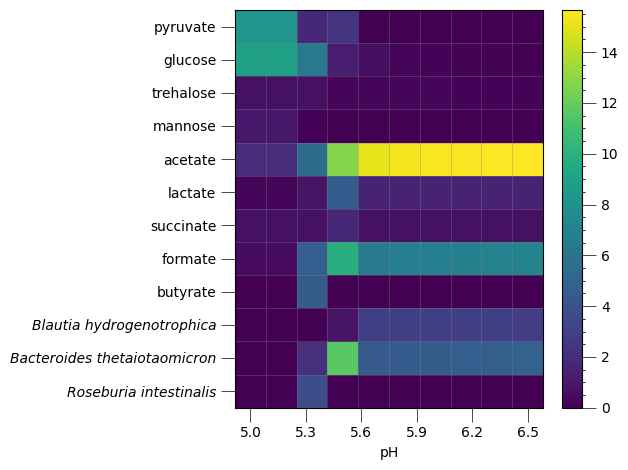

In [ ]:
create_heatmap(dataM,
               rows,
               np.linspace(0,simulation_points-1, 6),
               np.round(np.linspace(5, 6.5, 6),3),
               'pH',
               None,
               None,
               fileName = None) #os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'multistability', 'dilution.png'))

# Highlighted simulations

Figure 3 shows seven insets with model simulations that illustrate the tipping points and history dependece of the model. In the following, we reproduce these Figures.

The initial metabolite concentrations are the averages from our measurements of the blank WC medium, we set the initial concentration of bacterial cells to be equal for the three species and withing the range of our experiments ($0.003*10^5 cell/uL$). When the pH is not fixed, it is an emergent state of the model.

#### Dilution rate of $0.039 h^{-1}$

First import the packages and load the scripts

In [ ]:
from pathlib import Path
import os
import sys


sys.path.append(os.path.join(Path(os.getcwd()).parents[0], 'core'))
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], 'db'))
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], 'compare2experiments'))

from readModelDB import *
from mainClasses import *
from loadParameters import *
from general import *


Load the file containg pH and organic acid concentration measurements used in the linear model. Available [here](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/bhbtri_ipH4.tsv).

In [ ]:
#pH profile
ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')

databaseName = 'modelDB_bhbtri.sqlite3'

databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

set the parameters and load the database (this database contains the default WC measurements, which are set as initial conditions)

In [ ]:
#update database with parameters from a file
##########################################

#create a database connection
conn = create_connection(os.path.join(databaseFolder, databaseName))

#load the parameter file (parameter files are located at "/files/params" )
bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


#assign these parameters (depending on the strain, use the specific function)
assignBhParams(bh_params, conn)
assignBtParams(bt_params, conn)
assignRiParams(ri_params, conn)

#Load database
db = get_database(os.path.join(databaseFolder, databaseName))

Create metabolome and feed objects

In [ ]:
wc = createMetabolome(db, 'wc')
predictpH = getpH(wc.metabolites, ipH_path)
wc_feed = createMetabolome(db, 'wc', pH, pHFunc=predictpH)
wc_reactor = createMetabolome(db, 'wc', pH, pHFunc=predictpH)

Make the feed steril since we are not simulating migrations.

In [ ]:
feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
feed_microbiome.subpopD['xa'].count = 0
feed_microbiome.subpopD['xe'].count = 0
feed_microbiome.subpopD['xi'].count = 0

Create the reactor object, with starting populations

In [ ]:
reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
reactor_microbiome.subpopD['xa'].count = 0.003 #bh
reactor_microbiome.subpopD['xe'].count = 0.003 #bt
reactor_microbiome.subpopD['xi'].count = 0.003 #ri

Create the pulse with a dilution factor of $0.585$, which when divided by a volume of 15 mL, corresponds to a dilution rate of $0.039 h^{-1}$. Add the pulse to the reactor object.

In [ ]:
d = 0.585
batchA = Pulse(wc_feed, feed_microbiome, 0, 6000, 100, 0, 0, d,d)

#simulate
reactorA = Reactor(reactor_microbiome, wc_reactor,[batchA], 15)

simulate the reaction

In [ ]:
reactorA.simulate()

Plot the results using the "makeKineticPlot" function that is already loaded in our workspace. (code available [here](https://github.com/danielriosgarza/hungerGamesModel/blob/main/scripts/compare2experiments/general.py))

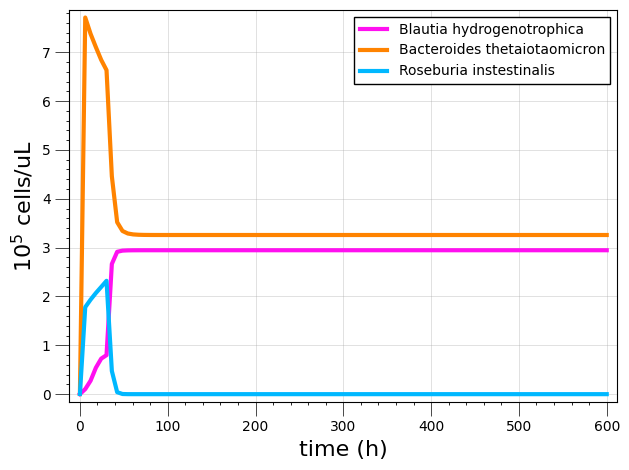

In [ ]:
makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[0],
                color = '#FF10F0',
                legend = 'Blautia hydrogenotrophica',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)



makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[1],
                color = '#ff8300',
                legend = 'Bacteroides thetaiotaomicron',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[2],
                color = '#00B8FF',
                legend = 'Roseburia instestinalis',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


#uncomment to save the Figure
#title = 'stateA'
#plt.savefig(os.path.join(Path(os.getcwd()).parents[2], 'files', 'Figures', 'multistability', title + '.png'), transparent=True, dpi=600)
plt.show()


#### Dilution rate of $0.041 h^{-1}$
Analogous to the above, only replacing the values of the dilution factor.

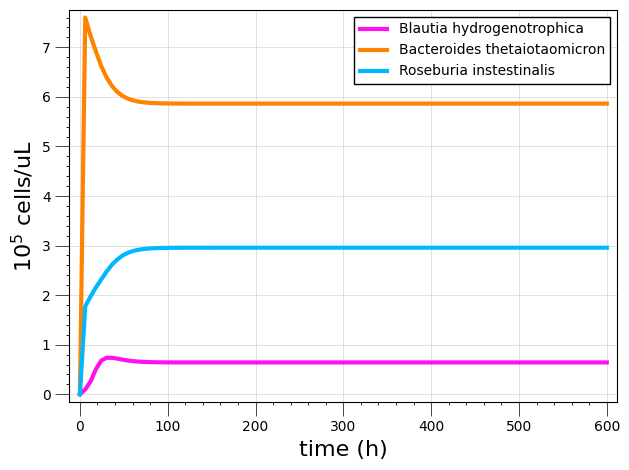

In [ ]:
#pH profile
ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')

databaseName = 'modelDB_bhbtri.sqlite3'

databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

#update database with parameters from a file
##########################################

#create a database connection
conn = create_connection(os.path.join(databaseFolder, databaseName))

#load the parameter file (parameter files are located at "/files/params" )
bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


#assign these parameters (depending on the strain, use the specific function)
assignBhParams(bh_params, conn)
assignBtParams(bt_params, conn)
assignRiParams(ri_params, conn)

#Load database
db = get_database(os.path.join(databaseFolder, databaseName))

#getStarting pH
wc = createMetabolome(db, 'wc')
predictpH = getpH(wc.metabolites, ipH_path)
pH =  predictpH(wc.get_concentration())

#get the feed media and the reactor media
wc_feed = createMetabolome(db, 'wc', pH, pHFunc=predictpH)
wc_reactor = createMetabolome(db, 'wc', pH, pHFunc=predictpH)

#get the feed obj. Make it sterile
feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
feed_microbiome.subpopD['xa'].count = 0
feed_microbiome.subpopD['xe'].count = 0
feed_microbiome.subpopD['xi'].count = 0

#create the reactor obj, with starting populations
reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
reactor_microbiome.subpopD['xa'].count = 0.003
reactor_microbiome.subpopD['xe'].count = 0.003
reactor_microbiome.subpopD['xi'].count = 0.003


d = 0.615

batchA = Pulse(wc_feed, feed_microbiome, 0, 6000, 100, 0, 0, d,d)

#simulate
reactorA = Reactor(reactor_microbiome, wc_reactor,[batchA], 15)



reactorA.simulate()
#reactorA.makePlots()

# ####################Subpopulations

makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[0],
                color = '#FF10F0',
                legend = 'Blautia hydrogenotrophica',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)



makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[1],
                color = '#ff8300',
                legend = 'Bacteroides thetaiotaomicron',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[2],
                color = '#00B8FF',
                legend = 'Roseburia instestinalis',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


#uncomment to save the Figure
#title = 'stateA'
#plt.savefig(os.path.join(Path(os.getcwd()).parents[2], 'files', 'Figures', 'multistability', title + '.png'), transparent=True, dpi=600)
plt.show()

#### Dilution rate of $0.041 h^{-1}$ with a "stop feed" perturbation

Now we perfom a similar simulation as above, but interrupt the feed for 24h (dilution factor = 0) and restore it to $0.041 h^{-1}$.

This is implemented by creating three pulse objects ([see](https://github.com/danielriosgarza/hungerGamesModel/wiki/Generic-model)).



In [ ]:
#pH profile
ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')

databaseName = 'modelDB_bhbtri.sqlite3'

databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

#update database with parameters from a file
##########################################

#create a database connection
conn = create_connection(os.path.join(databaseFolder, databaseName))

#load the parameter file (parameter files are located at "/files/params" )
bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


#assign these parameters (depending on the strain, use the specific function)
assignBhParams(bh_params, conn)
assignBtParams(bt_params, conn)
assignRiParams(ri_params, conn)

#Load database
db = get_database(os.path.join(databaseFolder, databaseName))

#getStarting pH
wc = createMetabolome(db, 'wc')
predictpH = getpH(wc.metabolites, ipH_path)
pH =  predictpH(wc.get_concentration())

#get the feed media and the reactor media
wc_feed = createMetabolome(db, 'wc', pH, pHFunc=predictpH)

wc_reactor = createMetabolome(db, 'wc', pH, pHFunc=predictpH)


#get the feed obj. Make it sterile
feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
feed_microbiome.subpopD['xa'].count = 0
feed_microbiome.subpopD['xe'].count = 0
feed_microbiome.subpopD['xi'].count = 0

#create the reactor obj, with starting populations
reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
reactor_microbiome.subpopD['xa'].count = 0.003
reactor_microbiome.subpopD['xe'].count = 0.003
reactor_microbiome.subpopD['xi'].count = 0.003




simulate a reactor with three pulse objects.

In [ ]:
d = 0.615
perturb = 0.0

batchA = Pulse(wc_feed, feed_microbiome, 0, 2400, 100, 0, 0, d,d)

batchB = Pulse(wc_feed, feed_microbiome, 2400, 2640, 100, 0, 0, perturb,perturb)

batchC = Pulse(wc_feed, feed_microbiome, 2640, 5040, 100, 0, 0, d,d)


#simulate
reactorA = Reactor(reactor_microbiome, wc_reactor,[
                                                  batchA,
                                                  batchB,
                                                  batchC
                                                   ], 15)



reactorA.simulate()


make the Figures

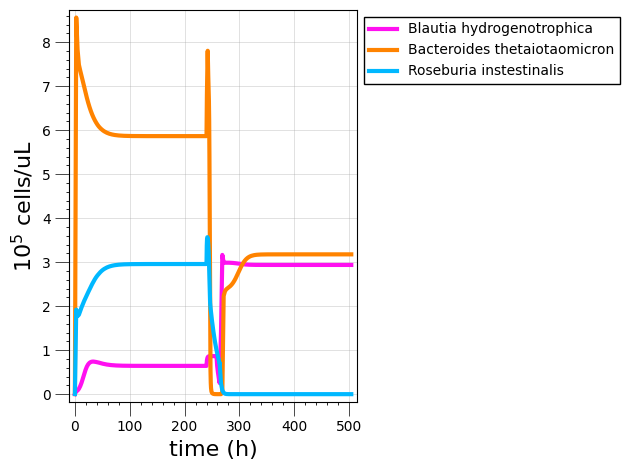

In [ ]:


# ####################Subpopulations

makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[0],
                color = '#FF10F0',
                legend = 'Blautia hydrogenotrophica',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)



makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[1],
                color = '#ff8300',
                legend = 'Bacteroides thetaiotaomicron',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[2],
                color = '#00B8FF',
                legend = 'Roseburia instestinalis',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


title = 'stateA'
#plt.savefig(os.path.join(Path(os.getcwd()).parents[2], 'files', 'Figures', 'multistability', title + '.png'), transparent=True, dpi=600)
plt.show()

# History-dependence
The previous plot showed the coexistence of two alternative states under the same parameter values (hysteresis). However, from the plot it is not clear if *Roseburia intestinalis* dies during the feed-stop. We briefly show that this is not the case, by simulating the system until the end of the feed perturbation and ploting the kinetics.

In [ ]:
#pH profile
ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')

databaseName = 'modelDB_bhbtri.sqlite3'

databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

#update database with parameters from a file
##########################################

#create a database connection
conn = create_connection(os.path.join(databaseFolder, databaseName))

#load the parameter file (parameter files are located at "/files/params" )
bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


#assign these parameters (depending on the strain, use the specific function)
assignBhParams(bh_params, conn)
assignBtParams(bt_params, conn)
assignRiParams(ri_params, conn)

#Load database
db = get_database(os.path.join(databaseFolder, databaseName))

#getStarting pH
wc = createMetabolome(db, 'wc')
predictpH = getpH(wc.metabolites, ipH_path)
pH =  predictpH(wc.get_concentration())

#get the feed media and the reactor media
wc_feed = createMetabolome(db, 'wc', pH, pHFunc=predictpH)

wc_reactor = createMetabolome(db, 'wc', pH, pHFunc=predictpH)


#get the feed obj. Make it sterile
feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
feed_microbiome.subpopD['xa'].count = 0
feed_microbiome.subpopD['xe'].count = 0
feed_microbiome.subpopD['xi'].count = 0

#create the reactor obj, with starting populations
reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
reactor_microbiome.subpopD['xa'].count = 0.003
reactor_microbiome.subpopD['xe'].count = 0.003
reactor_microbiome.subpopD['xi'].count = 0.003




Add only the perturbation pulse

In [ ]:
d = 0.615
perturb = 0.0

batchA = Pulse(wc_feed, feed_microbiome, 0, 2400, 100, 0, 0, d,d)

batchB = Pulse(wc_feed, feed_microbiome, 2400, 2640, 100, 0, 0, perturb,perturb)

#simulate
reactorA = Reactor(reactor_microbiome, wc_reactor,[
                                                  batchA,
                                                  batchB
                                                   ], 15)

reactorA.simulate()

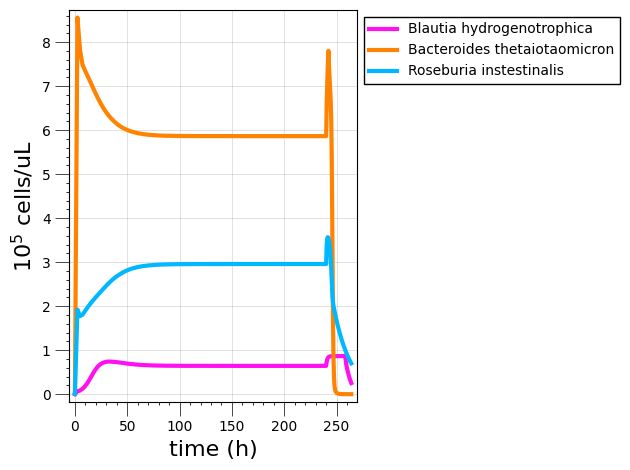

In [ ]:
makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[0],
                color = '#FF10F0',
                legend = 'Blautia hydrogenotrophica',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)



makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[1],
                color = '#ff8300',
                legend = 'Bacteroides thetaiotaomicron',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[2],
                color = '#00B8FF',
                legend = 'Roseburia instestinalis',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


title = 'stateA'
#plt.savefig(os.path.join(Path(os.getcwd()).parents[2], 'files', 'Figures', 'multistability', title + '.png'), transparent=True, dpi=600)
plt.show()

Clearly *Roseburia instestinalis* is not extinct at the end of the perturbation.

#### pH 5.47

Next we simulate the system with fixed pH values. Steps are simular to the above

pH 5.47


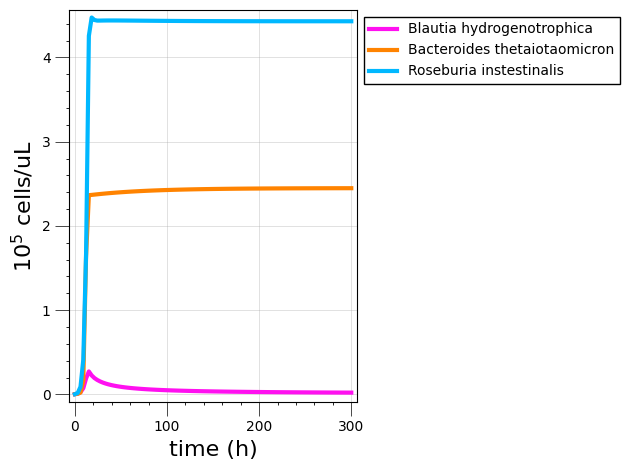

In [ ]:
def mockpHfunc(metObj, pH=7.0):
    def pHfunc(metObj):
        return pH
    return pHfunc


#pH profile
ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')

databaseName = 'modelDB_bhbtri.sqlite3'

databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

#update database with parameters from a file
##########################################

#create a database connection
conn = create_connection(os.path.join(databaseFolder, databaseName))

#load the parameter file (parameter files are located at "/files/params" )
bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


#assign these parameters (depending on the strain, use the specific function)
assignBhParams(bh_params, conn)
assignBtParams(bt_params, conn)
assignRiParams(ri_params, conn)

#Load database
db = get_database(os.path.join(databaseFolder, databaseName))

fixedpH = 5.47
#getStarting pH
wc = createMetabolome(db, 'wc')
predictpH = getpH(wc.metabolites, ipH_path)
fixedpHA = mockpHfunc(wc.metabolites,pH=fixedpH)
pH =  predictpH(wc.get_concentration())

#get the feed media and the reactor media
wc_feedA = createMetabolome(db, 'wc', pH, pHFunc=fixedpHA)
wc_reactorA = createMetabolome(db, 'wc', pH, pHFunc=fixedpHA)


#get the feed obj. Make it sterile
feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
feed_microbiome.subpopD['xa'].count = 0
feed_microbiome.subpopD['xe'].count = 0
feed_microbiome.subpopD['xi'].count = 0

#create the reactor obj, with starting populations
reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
reactor_microbiome.subpopD['xa'].count = 0.003
reactor_microbiome.subpopD['xe'].count = 0.003
reactor_microbiome.subpopD['xi'].count = 0.003


d = 1.0




batchA = Pulse(wc_feedA, feed_microbiome, 0, 3000, 100, 0, 0, d,d)



#simulate
reactorA = Reactor(reactor_microbiome, wc_reactorA,[batchA], 15)



reactorA.simulate()
#reactorA.makePlots()

print(f"pH {fixedpH}")
makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[0],
                color = '#FF10F0',
                legend = 'Blautia hydrogenotrophica',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)



makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[1],
                color = '#ff8300',
                legend = 'Bacteroides thetaiotaomicron',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[2],
                color = '#00B8FF',
                legend = 'Roseburia instestinalis',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


title = 'stateA'
#plt.savefig(os.path.join(Path(os.getcwd()).parents[2], 'files', 'Figures', 'multistability', title + '.png'), transparent=True, dpi=600)
plt.show()


#### pH 5.50

pH 5.5


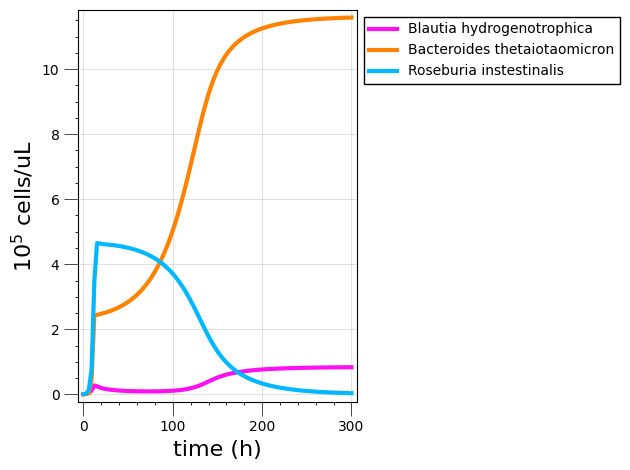

In [ ]:
def mockpHfunc(metObj, pH=7.0):
    def pHfunc(metObj):
        return pH
    return pHfunc


#pH profile
ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')

databaseName = 'modelDB_bhbtri.sqlite3'

databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

#update database with parameters from a file
##########################################

#create a database connection
conn = create_connection(os.path.join(databaseFolder, databaseName))

#load the parameter file (parameter files are located at "/files/params" )
bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


#assign these parameters (depending on the strain, use the specific function)
assignBhParams(bh_params, conn)
assignBtParams(bt_params, conn)
assignRiParams(ri_params, conn)

#Load database
db = get_database(os.path.join(databaseFolder, databaseName))

fixedpH = 5.50
#getStarting pH
wc = createMetabolome(db, 'wc')
predictpH = getpH(wc.metabolites, ipH_path)
fixedpHA = mockpHfunc(wc.metabolites,pH=fixedpH)
pH =  predictpH(wc.get_concentration())

#get the feed media and the reactor media
wc_feedA = createMetabolome(db, 'wc', pH, pHFunc=fixedpHA)
wc_reactorA = createMetabolome(db, 'wc', pH, pHFunc=fixedpHA)


#get the feed obj. Make it sterile
feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
feed_microbiome.subpopD['xa'].count = 0
feed_microbiome.subpopD['xe'].count = 0
feed_microbiome.subpopD['xi'].count = 0

#create the reactor obj, with starting populations
reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
reactor_microbiome.subpopD['xa'].count = 0.003
reactor_microbiome.subpopD['xe'].count = 0.003
reactor_microbiome.subpopD['xi'].count = 0.003


d = 1.0




batchA = Pulse(wc_feedA, feed_microbiome, 0, 3000, 100, 0, 0, d,d)



#simulate
reactorA = Reactor(reactor_microbiome, wc_reactorA,[batchA], 15)



reactorA.simulate()
#reactorA.makePlots()

print(f"pH {fixedpH}")
makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[0],
                color = '#FF10F0',
                legend = 'Blautia hydrogenotrophica',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)



makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[1],
                color = '#ff8300',
                legend = 'Bacteroides thetaiotaomicron',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[2],
                color = '#00B8FF',
                legend = 'Roseburia instestinalis',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


title = 'stateA'
#plt.savefig(os.path.join(Path(os.getcwd()).parents[2], 'files', 'Figures', 'multistability', title + '.png'), transparent=True, dpi=600)
plt.show()

#### pH 5.60

pH 5.6


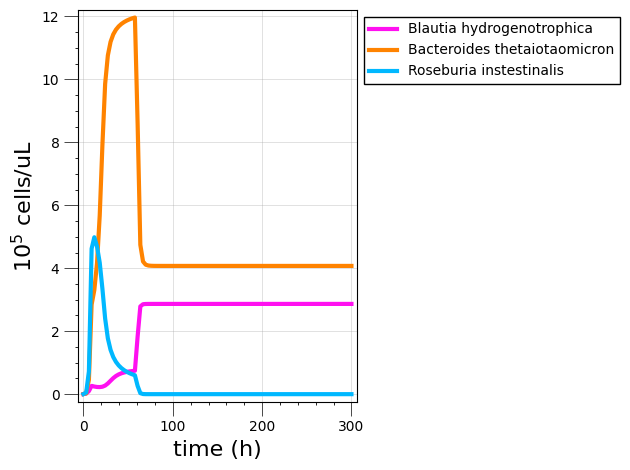

In [ ]:
def mockpHfunc(metObj, pH=7.0):
    def pHfunc(metObj):
        return pH
    return pHfunc


#pH profile
ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')

databaseName = 'modelDB_bhbtri.sqlite3'

databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

#update database with parameters from a file
##########################################

#create a database connection
conn = create_connection(os.path.join(databaseFolder, databaseName))

#load the parameter file (parameter files are located at "/files/params" )
bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


#assign these parameters (depending on the strain, use the specific function)
assignBhParams(bh_params, conn)
assignBtParams(bt_params, conn)
assignRiParams(ri_params, conn)

#Load database
db = get_database(os.path.join(databaseFolder, databaseName))

fixedpH = 5.60
#getStarting pH
wc = createMetabolome(db, 'wc')
predictpH = getpH(wc.metabolites, ipH_path)
fixedpHA = mockpHfunc(wc.metabolites,pH=fixedpH)
pH =  predictpH(wc.get_concentration())

#get the feed media and the reactor media
wc_feedA = createMetabolome(db, 'wc', pH, pHFunc=fixedpHA)
wc_reactorA = createMetabolome(db, 'wc', pH, pHFunc=fixedpHA)


#get the feed obj. Make it sterile
feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
feed_microbiome.subpopD['xa'].count = 0
feed_microbiome.subpopD['xe'].count = 0
feed_microbiome.subpopD['xi'].count = 0

#create the reactor obj, with starting populations
reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
reactor_microbiome.subpopD['xa'].count = 0.003
reactor_microbiome.subpopD['xe'].count = 0.003
reactor_microbiome.subpopD['xi'].count = 0.003


d = 1.0




batchA = Pulse(wc_feedA, feed_microbiome, 0, 3000, 100, 0, 0, d,d)



#simulate
reactorA = Reactor(reactor_microbiome, wc_reactorA,[batchA], 15)



reactorA.simulate()
#reactorA.makePlots()

print(f"pH {fixedpH}")
makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[0],
                color = '#FF10F0',
                legend = 'Blautia hydrogenotrophica',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)



makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[1],
                color = '#ff8300',
                legend = 'Bacteroides thetaiotaomicron',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[2],
                color = '#00B8FF',
                legend = 'Roseburia instestinalis',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


title = 'stateA'
#plt.savefig(os.path.join(Path(os.getcwd()).parents[2], 'files', 'Figures', 'multistability', title + '.png'), transparent=True, dpi=600)
plt.show()

#### Starting with pH 5.60, then switching to 5.47
To simulate reactors with two different pH regimes we simulate the first reactor for 60h, then transfer its current state values to a new reactor object, which operates under a different pH value. We then continue the simulation for 240 h.


pH 5.6 and 5.47


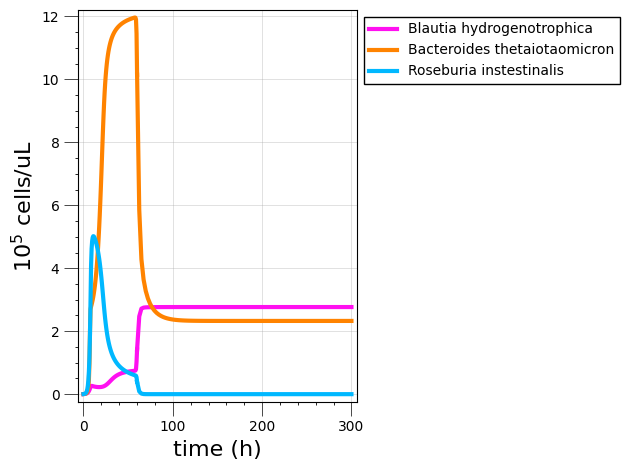

In [ ]:
def mockpHfunc(metObj, pH=7.0):
    def pHfunc(metObj):
        return pH
    return pHfunc


#pH profile
ipH_path = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'bhbtri_ipH4.tsv')

databaseName = 'modelDB_bhbtri.sqlite3'

databaseFolder =  os.path.join(Path(os.getcwd()).parents[1], 'files', 'dbs')

#update database with parameters from a file
##########################################

#create a database connection
conn = create_connection(os.path.join(databaseFolder, databaseName))

#load the parameter file (parameter files are located at "/files/params" )
bh_params = getPramsFromFile('bh', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'bh.tsv'))
bt_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))
ri_params = getPramsFromFile('bhbtri', os.path.join(Path(os.getcwd()).parents[1], 'files', 'params', 'btri.tsv'))


#assign these parameters (depending on the strain, use the specific function)
assignBhParams(bh_params, conn)
assignBtParams(bt_params, conn)
assignRiParams(ri_params, conn)

#Load database
db = get_database(os.path.join(databaseFolder, databaseName))

fixedpH1 = 5.60
fixedpH2 = 5.47

#getStarting pH
wc = createMetabolome(db, 'wc')
predictpH = getpH(wc.metabolites, ipH_path)
fixedpHA = mockpHfunc(wc.metabolites,pH=fixedpH1)
fixedpHC = mockpHfunc(wc.metabolites,pH=fixedpH2)
pH =  predictpH(wc.get_concentration())

#get the feed media and the reactor media
wc_feedA = createMetabolome(db, 'wc', pH, pHFunc=fixedpHA)
wc_feedC = createMetabolome(db, 'wc', pH, pHFunc=fixedpHC)

wc_reactorA = createMetabolome(db, 'wc', pH, pHFunc=fixedpHA)
wc_reactorC = createMetabolome(db, 'wc', pH, pHFunc=fixedpHC)


#get the feed obj. Make it sterile
feed_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                              'bt':createBacteria(db, 'bt', 'wc'),
                              'ri':createBacteria(db, 'ri', 'wc')})
feed_microbiome.subpopD['xa'].count = 0
feed_microbiome.subpopD['xe'].count = 0
feed_microbiome.subpopD['xi'].count = 0

#create the reactor obj, with starting populations
reactor_microbiome = Microbiome({'bh':createBacteria(db, 'bh', 'wc'),
                                 'bt':createBacteria(db, 'bt', 'wc'),
                                 'ri':createBacteria(db, 'ri', 'wc')})
reactor_microbiome.subpopD['xa'].count = 0.003
reactor_microbiome.subpopD['xe'].count = 0.003
reactor_microbiome.subpopD['xi'].count = 0.003


d = 1.0




batchA = Pulse(wc_feedA, feed_microbiome, 0, 600, 100, 0, 0, d,d)

batchB = Pulse(wc_feedC, feed_microbiome, 600, 3000, 100, 0, 0, d,d)


#simulate
reactorA = Reactor(reactor_microbiome, wc_reactorA,[batchA], 15)



reactorA.simulate()
#reactorA.makePlots()



for i in wc_reactorA.metD:
    wc_reactorC.metD[i].update(wc_reactorA.metD[i].concentration)


reactorB = Reactor(reactorA.microbiome, wc_reactorC,[batchB], 15)

reactorB.simulate()


print(f"pH {fixedpH1} and {fixedpH2}")


makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[0],
                color = '#FF10F0',
                legend = 'Blautia hydrogenotrophica',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)

makeKineticPlot(x = reactorB.time_simul*0.1,
                y = reactorB.cellActive_dyn[0],
                color = '#FF10F0',
                legend = None,
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)




makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[1],
                color = '#ff8300',
                legend = 'Bacteroides thetaiotaomicron',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)

makeKineticPlot(x = reactorB.time_simul*0.1,
                y = reactorB.cellActive_dyn[1],
                color = '#ff8300',
                legend = None,
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)



makeKineticPlot(x = reactorA.time_simul*0.1,
                y = reactorA.cellActive_dyn[2],
                color = '#00B8FF',
                legend = 'Roseburia instestinalis',
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)

makeKineticPlot(x = reactorB.time_simul*0.1,
                y = reactorB.cellActive_dyn[2],
                color = '#00B8FF',
                legend = None,
                xlabel = 'time (h)',
                ylabel = '$10^5$ cells/uL',
                title = None,
                linestyle = '-',
                legendSize = 10)


title = 'stateA'
#plt.savefig(os.path.join(Path(os.getcwd()).parents[2], 'files', 'Figures', 'multistability', title + '.png'), transparent=True, dpi=600)
plt.show()

# Minibioreactor steady-states

Figure 3 also shows a heatmap with the terminal states of minibioreactor runs. This plot is reproduced below. The data for the end states is [here](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/strainSummaries/ambr/ambrSS.txt).

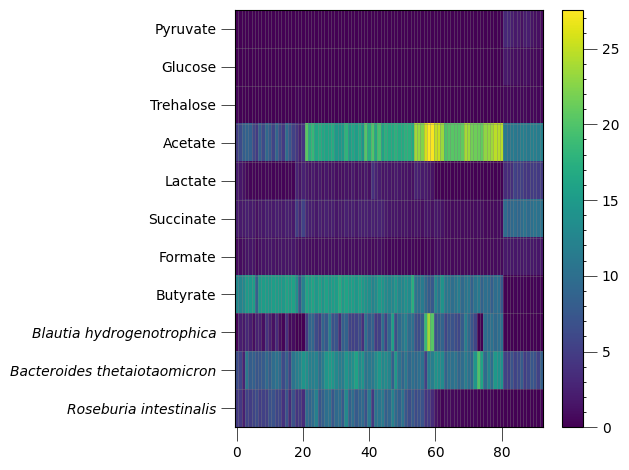

In [ ]:
import os
import sys
from pathlib import Path

from aquarel import load_theme

theme = load_theme("boxy_light")
theme.apply()

import matplotlib.pyplot as plt

sys.path.append(os.path.join(Path(os.getcwd()).parents[0], 'compare2experiments'))
from general import *


def create_heatmap(data, row_labels, x_positions, x_values, xlabel, ylabel, title, fileName = None):
    fig, ax = plt.subplots()
    heatmap = ax.imshow(data, aspect='auto')
    ax.grid(False)

    # Set row labels (y-axis)
    ax.set_yticks(np.arange(data.shape[0]))

    yticklabels = ax.set_yticklabels(row_labels)
    yticklabels[-1].set_fontstyle('italic')
    yticklabels[-2].set_fontstyle('italic')
    yticklabels[-3].set_fontstyle('italic')

    # Set specific x-ticks and labels (x-axis)
    #ax.set_xticks(x_positions)
    #ax.set_xticklabels(x_values, rotation =90, fontsize=4)

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Add grid
    ax.set_xticks(np.arange(-.5, data.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, data.shape[0], 1), minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    # Add colorbar
    cbar = ax.figure.colorbar(heatmap, ax=ax)
    plt.tight_layout()

    if fileName is not None:
        plt.savefig(fileName, transparent=True, dpi=600)

    plt.show()






strainSummaryFolder = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'ambr')



with open(os.path.join(strainSummaryFolder, 'ambrSS.txt')) as f:
    labels = f.readline().strip().split('\t')[5::]
    experiments = []
    condition = []
    data = {i:[] for i in labels}

    for line in f:
        a = line.strip().split('\t')
        experiments.append(a[0])
        condition.append(a[1])
        for i in range(len(labels)):
            data[labels[i]].append(float(a[i+5]))



cols = []

for i in condition:
    if 'E1_c' in i:
        cols.append('red')

    if 'E1_p' in i:
        cols.append('blue')

    if 'E2_c' in i:
        cols.append('green')
    if 'E2_p' in i:
        cols.append('purple')

    if i=='E2_Co':
        cols.append('black')
dataM = np.array([np.array(data[i]) for i in labels]).T

create_heatmap(dataM.T, labels, np.arange(len(experiments)), condition, None, None, None, fileName = os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'multistability', 'ambrHM.png'))




# Minibioreactor principal component animations

Next we generate animation of the experimental points in pricipal component space for two Minibioreactor experiments. These animations do not render in colab. Can only be viewed when locally saved as gif files. Examples are available [here](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/Figures/multistability/ambr_path/ambrExperiment1.gif) and [here](https://github.com/danielriosgarza/hungerGamesModel/blob/main/files/Figures/multistability/ambr_path/ambrExperiment2.gif).

In [ ]:
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Ellipse
import numpy as np


from aquarel import load_theme

theme = load_theme("boxy_light")
theme.apply()

#from sklearn.manifold import MDS as PCA
from sklearn.covariance import MinCovDet
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver ='randomized', power_iteration_normalizer='QR', iterated_power=10000)





def get_data(fileName):

    strainSummaryFolder = os.path.join(Path(os.getcwd()).parents[1], 'files', 'strainSummaries', 'ambr')



    with open(os.path.join(strainSummaryFolder, fileName)) as f:
        labels = f.readline().strip().split('\t')[4::]
        experiments = []
        conditions = []
        exclude= [ ]
        data = {i:[] for i in labels if i not in exclude}

        for line in f:
            a = line.strip().split('\t')
            experiments.append(a[0])
            conditions.append(a[2])
            for i in range(len(labels)):
                if labels[i] not in exclude:
                    data[labels[i]].append(float(a[i+4]))

    dataM = np.array([np.array(data[i]) for i in labels if i not in exclude]).T
    return labels, experiments, conditions, dataM






def getComposition(compVec):

    binary_comp = np.argsort(compVec)

    # Convert array to a tuple of its elements
    binary_comp_tuple = tuple(binary_comp.tolist())

    composition_dict = {
        (0, 1, 2): 1,
        (0, 2, 1): 2,
        (1, 0, 2): 3,
        (1, 2, 0): 4,
        (2, 0, 1): 5,
        (2, 1, 0): 6,

    }

    return composition_dict.get(binary_comp_tuple, 0)




def getEllipse(points, scale_factor=2.5):
    """
    Plot the smallest enclosing ellipse around the given points.

    Arguments:
    points -- np.array of points
    """
    # Robustly estimate covariance
    robust_cov = MinCovDet().fit(points)
    center = robust_cov.location_
    covariance = robust_cov.covariance_

    # Eigenvalues and eigenvectors of the covariance matrix
    vals, vecs = np.linalg.eigh(covariance)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:,order]

    # Calculate the angle and dimensions of the ellipse
    angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * np.sqrt(vals) * scale_factor

    return center, width, height, angle


def minimum_bounding_ellipse(data):
    """
    Finds the minimum bounding ellipse for a set of points without using OpenCV.

    Parameters:
        data (numpy.ndarray): A 2D array of points.

    Returns:
        numpy.ndarray: The center of the ellipse.
        float: The semi-major axis of the ellipse.
        float: The semi-minor axis of the ellipse.
        double: The angle of rotation of the ellipse.
    """

    # Check if data is a 2D array
    if data.ndim != 2:
        raise ValueError("Data must be a 2D array")

    # Find the mean of the data
    mean = np.mean(data, axis=0)

    # Create a matrix of pairwise distances
    distances = np.zeros((data.shape[0], data.shape[0]))
    for i, row in enumerate(data):
        for j, other_row in enumerate(data):
            distances[i, j] = np.linalg.norm(row - other_row)

    # Form the covariance matrix
    covariance = np.zeros((2, 2))
    for i, row in enumerate(data):
        covariance += np.outer((row - mean), (row - mean))

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    # Find the semi-major and semi-minor axes
    semi_major_axis = np.sqrt(eigenvalues[0])
    semi_minor_axis = np.sqrt(eigenvalues[1])

    # Find the angle of rotation
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

    # Calculate the center of the ellipse
    ellipse_center = mean

    return ellipse_center, semi_major_axis, semi_minor_axis, angle


def min_volume_enclosing_ellipse(points, tolerance=0.01):
    """
    Find the minimum volume enclosing ellipse of a set of points.

    Arguments:
    points -- 2D numpy array of points.
    tolerance -- Tolerance for the stopping criterion.

    Returns:
    A tuple containing the center and the axes lengths of the ellipse.
    """
    N, d = points.shape
    Q = np.vstack([points.T, np.ones(N)])
    err = 1.0 + tolerance
    u = np.ones(N) / N

    while err > tolerance:
        X = np.dot(np.dot(Q, np.diag(u)), Q.T)
        M = np.diag(np.dot(np.dot(Q.T, np.linalg.inv(X)), Q))
        j = np.argmax(M)
        maximum = M[j]
        step_size = (maximum - d - 1) / ((d + 1) * (maximum - 1))
        new_u = (1 - step_size) * u
        new_u[j] += step_size
        err = np.linalg.norm(new_u - u)
        u = new_u

    center = np.dot(points.T, u)
    A = np.linalg.inv(np.dot(np.dot(points.T, np.diag(u)), points) - np.outer(center, center)) / d

    U, s, _ = np.linalg.svd(A)
    radii = 1 / np.sqrt(s)

    angle = np.arctan2(U[0, 1], U[0, 0]) * 180 / np.pi

    return center,  2*radii[0], 2*radii[1],angle


labels, experiments, conditions, dataM = get_data('ambrAll.txt')

In [ ]:
initInd_c1 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C1']# or conditions[i] == 'E2_c1' ]
initInd_c2 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C2']# or conditions[i] == 'E2_c2' ]
initInd_c3 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C3']# or conditions[i] == 'E2_c2' ]
initInd_c4 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C4']# or conditions[i] == 'E2_c2' ]
initInd_c5 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C5']# or conditions[i] == 'E2_c2' ]
initInd_c6 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C6']# or conditions[i] == 'E2_c2' ]
initInd_c7 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C7']# or conditions[i] == 'E2_c2' ]
initInd_c8 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C8']# or conditions[i] == 'E2_c2' ]
initInd_c9 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C9']# or conditions[i] == 'E2_c2' ]
initInd_c10 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C10']# or conditions[i] == 'E2_c2' ]
initInd_c11 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C11']# or conditions[i] == 'E2_c2' ]
initInd_c12 = [i for i in range(len(conditions)) if conditions[i] == 'E1_C12']# or conditions[i] == 'E2_c2' ]

initInd_p1 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P1']# or conditions[i] == 'E2_c2' ]
initInd_p2 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P2']# or conditions[i] == 'E2_c2' ]
initInd_p3 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P3']# or conditions[i] == 'E2_c2' ]
initInd_p4 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P4']# or conditions[i] == 'E2_c2' ]
initInd_p5 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P5']# or conditions[i] == 'E2_c2' ]
initInd_p6 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P6']# or conditions[i] == 'E2_c2' ]
initInd_p7 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P7']# or conditions[i] == 'E2_c2' ]
initInd_p8 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P8']# or conditions[i] == 'E2_c2' ]
initInd_p9 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P9']# or conditions[i] == 'E2_c2' ]
initInd_p10 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P10']# or conditions[i] == 'E2_c2' ]
initInd_p11 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P11']# or conditions[i] == 'E2_c2' ]
initInd_p12 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P12']# or conditions[i] == 'E2_c2' ]
initInd_p13 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P13']# or conditions[i] == 'E2_c2' ]
initInd_p14 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P14']# or conditions[i] == 'E2_c2' ]
initInd_p15 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P15']# or conditions[i] == 'E2_c2' ]
initInd_p16 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P16']# or conditions[i] == 'E2_c2' ]
initInd_p17 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P17']# or conditions[i] == 'E2_c2' ]
initInd_p18 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P18']# or conditions[i] == 'E2_c2' ]
initInd_p19 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P19']# or conditions[i] == 'E2_c2' ]
initInd_p20 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P20']# or conditions[i] == 'E2_c2' ]
initInd_p21 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P21']# or conditions[i] == 'E2_c2' ]
initInd_p22 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P22']# or conditions[i] == 'E2_c2' ]
initInd_p23 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P23']# or conditions[i] == 'E2_c2' ]
initInd_p24 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P24']# or conditions[i] == 'E2_c2' ]
initInd_p25 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P25']# or conditions[i] == 'E2_c2' ]
initInd_p26 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P26']# or conditions[i] == 'E2_c2' ]
initInd_p27 = [i for i in range(len(conditions)) if conditions[i] == 'E1_P27']# or conditions[i] == 'E2_c2' ]


initInd_c1b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C1' ]
initInd_c2b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C2' ]
initInd_c3b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C3' ]
initInd_c4b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C4' ]
initInd_c5b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C5' ]
initInd_c6b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C6' ]
initInd_c7b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C7' ]
initInd_c8b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C8' ]
initInd_c9b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C9' ]
initInd_c10b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C10' ]
initInd_c11b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C11' ]
initInd_c12b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C12' ]
initInd_c13b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C13' ]
initInd_c14b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C14' ]
initInd_c15b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C15' ]
initInd_c16b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C16' ]
initInd_c17b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C17' ]
initInd_c18b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C18' ]
initInd_c19b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C19' ]
initInd_c20b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C20' ]
initInd_c21b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C21' ]
initInd_c22b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C22' ]
initInd_c23b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C23' ]
initInd_c24b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C24' ]
initInd_c25b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C25' ]
initInd_c26b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C26' ]
initInd_c27b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C27' ]
initInd_c28b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C28' ]
initInd_c29b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C29' ]
initInd_c30b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C30' ]
initInd_c31b = [i for i in range(len(conditions)) if conditions[i] == 'E2_C31' ]



initInd_p1b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P1' ]
initInd_p2b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P2' ]
initInd_p3b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P3' ]
initInd_p4b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P4' ]
initInd_p5b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P5' ]
initInd_p6b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P6' ]
initInd_p7b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P7' ]
initInd_p8b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P8' ]
initInd_p9b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P9' ]
initInd_p10b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P10' ]
initInd_p11b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P11' ]
initInd_p12b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P12' ]
initInd_p13b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P13' ]
initInd_p14b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P14' ]
initInd_p15b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P15' ]
initInd_p16b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P16' ]
initInd_p17b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P17' ]
initInd_p18b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P18' ]
initInd_p19b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P19' ]
initInd_p20b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P20' ]
initInd_p21b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P21' ]
initInd_p22b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P22' ]
initInd_p23b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P23' ]
initInd_p24b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P24' ]
initInd_p25b = [i for i in range(len(conditions)) if conditions[i] == 'E2_P25' ]

#### Experiment 1

<Figure size 800x600 with 0 Axes>

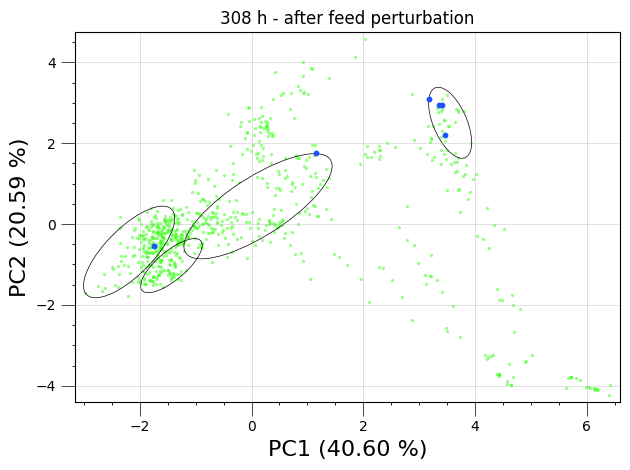

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataM)


transformed_data = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

stateA = initInd_c10 + initInd_c11 + initInd_c12  +[i for i in range(len(conditions)) if ((conditions[i] == 'E1_P27') or (conditions[i] == 'E1_P26') or (conditions[i] == 'E1_P25')) and (experiments[i]=='A6_C2_V12') ]


stateB =  initInd_c17b + initInd_c18b + initInd_c19b #initInd_c29b + initInd_c30b + initInd_c31b

samplesC = ['A7_C2_V7', 'A7_C2_V8', 'A7_C2_V9', 'A7_C2_V10', 'A7_C2_V11', 'A7_C2_V12']
stateC = [i for i in range(len(conditions)) if ((conditions[i] == 'E2_P23') or (conditions[i] == 'E2_P24') or (conditions[i] == 'E2_P25')) and (experiments[i] in samplesC) ]

samplesD = ['A6_C2_V7', 'A6_C2_V8', 'A6_C2_V9', 'A6_C2_V11']
stateD = [i for i in range(len(conditions)) if ((conditions[i] == 'E1_P25') or (conditions[i] == 'E1_P26') or (conditions[i] == 'E1_P27')) and (experiments[i] in samplesD) ]

##############################


def update(frame):
    # Extract the x and y coordinates of the current group
    x_coords = transformed_data[arbitrary_groups[frame], 0]
    y_coords = transformed_data[arbitrary_groups[frame], 1]

    # Update the data of the highlight scatter plot
    highlight_scatter.set_offsets(np.c_[x_coords, y_coords])

    ax.set_title(frame_titles[frame])

    plt.tight_layout()

    return scatter, highlight_scatter



#Path to non-perturbed state
#####################################################################################################################
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
scatter = ax.scatter(transformed_data.T[0], transformed_data.T[1], c='#39FF14', s=5, alpha = 0.5, linewidths=0.1, zorder=1)
highlight_scatter = ax.scatter([], [], color='#1F51FF', alpha=1.0, zorder=2, s=10)

plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f} %)', fontsize=16)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f} %)', fontsize=16)

c1, w1, h1, a1 = min_volume_enclosing_ellipse(transformed_data[stateA])
c2, w2, h2, a2 = min_volume_enclosing_ellipse(transformed_data[stateB])
c3, w3, h3, a3 = min_volume_enclosing_ellipse(transformed_data[stateC])
c4, w4, h4, a4 = min_volume_enclosing_ellipse(transformed_data[stateD])
ell1 = Ellipse(xy=c1,
              width=w1, height=h1,
              angle=a1, edgecolor='black', fc='None', lw=0.5)



ell2 = Ellipse(xy=c2,
              width=w2, height=h2,
              angle= a2, edgecolor='black', fc='None', lw=0.5)


ell3 = Ellipse(xy=c3,
              width=w3, height=h3,
              angle=a3, edgecolor='black', fc='None', lw=0.5)

ell4 = Ellipse(xy=c4,
              width=w4, height=h4,
              angle=a4, edgecolor='black', fc='None', lw=0.5)


ax.add_patch(ell1)
ax.add_patch(ell2)
ax.add_patch(ell3)
ax.add_patch(ell4)



# Example arbitrary groups of indices
arbitrary_groups = [
    initInd_c1,
    initInd_c2,
    initInd_c3,
    initInd_c4,
    initInd_c5,
    initInd_c6,
    initInd_c7,
    initInd_c8,
    initInd_c9,
    initInd_c10,
    initInd_c11,
    initInd_c12,
    initInd_p1,
    initInd_p2,
    initInd_p3,
    initInd_p4,
    initInd_p5,
    initInd_p6,
    initInd_p7,
    initInd_p8,
    initInd_p9,
    initInd_p10,
    initInd_p11,
    initInd_p12,
    initInd_p13,
    initInd_p14,
    initInd_p15,
    initInd_p16,
    initInd_p17,
    initInd_p18,
    initInd_p19,
    initInd_p20,
    initInd_p21,
    initInd_p22,
    initInd_p23,
    initInd_p24,
    initInd_p25,
    initInd_p26,
    initInd_p27

]

frame_titles = ['0 h - control conditions',
                '8 h - control conditions',
                '16 h - control conditions',
                '24 h - control conditions',
                '32 h - control conditions',
                '40 h - control conditions',
                '48 h - control conditions',
                '56 h - control conditions',
                '64 h - control conditions',
                '72 h - control conditions',
                '80 h - control conditions',
                '88 h - control conditions',
                '96 h - during pH perturbation',
                '104 h - during pH perturbation',
                '112 h - after pH perturbation',
                '120 h - after pH perturbation',
                '128 h - after pH perturbation',
                '136 h - after pH perturbation',
                '144 h - after pH perturbation',
                '152 h - during feed perturbation',
                '160 h - during feed perturbation',
                '168 h - during feed perturbation',
                '176 h - after feed perturbation',
                '184 h - after feed perturbation',
                '192 h - after feed perturbation',
                '200 h - after feed perturbation',
                '208 h - after feed perturbation',
                '216 h - after feed perturbation',
                '224 h - after feed perturbation',
                '232 h - after feed perturbation',
                '240 h - after feed perturbation',
                '248 h - after feed perturbation',
                '256 h - after feed perturbation',
                '264 h - after feed perturbation',
                '272 h - after feed perturbation',
                '280 h - after feed perturbation',
                '288 h - after feed perturbation',
                '296 h - after feed perturbation',
                '308 h - after feed perturbation'
                ]


ani = FuncAnimation(fig, update, frames=len(arbitrary_groups), interval=1000, blit=True)

plt.tight_layout()

fileName = os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'multistability', 'ambr_path', 'ambrExperiment1.gif')
ani.save(fileName, writer='imagemagick')
plt.show()

#### Experiment 2

<Figure size 800x600 with 0 Axes>

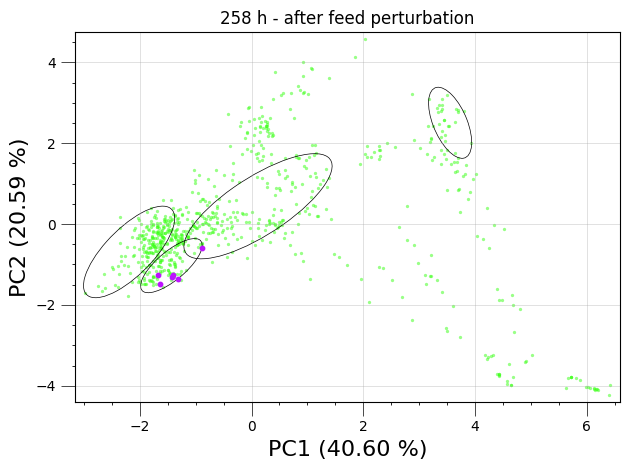

In [ ]:
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
scatter = ax.scatter(transformed_data.T[0], transformed_data.T[1], c='#39FF14', s=5, alpha = 0.5, linewidths=0.1, zorder=1)
highlight_scatter = ax.scatter([], [], color='#bc13fe', alpha=1.0, zorder=2, s=10)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f} %)', fontsize=16)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f} %)', fontsize=16)

c1, w1, h1, a1 = min_volume_enclosing_ellipse(transformed_data[stateA])
c2, w2, h2, a2 = min_volume_enclosing_ellipse(transformed_data[stateB])
c3, w3, h3, a3 = min_volume_enclosing_ellipse(transformed_data[stateC])
c4, w4, h4, a4 = min_volume_enclosing_ellipse(transformed_data[stateD])
ell1 = Ellipse(xy=c1,
              width=w1, height=h1,
              angle=a1, edgecolor='black', fc='None', lw=0.5)



ell2 = Ellipse(xy=c2,
              width=w2, height=h2,
              angle= a2, edgecolor='black', fc='None', lw=0.5)


ell3 = Ellipse(xy=c3,
              width=w3, height=h3,
              angle=a3, edgecolor='black', fc='None', lw=0.5)

ell4 = Ellipse(xy=c4,
              width=w4, height=h4,
              angle=a4, edgecolor='black', fc='None', lw=0.5)


ax.add_patch(ell1)
ax.add_patch(ell2)
ax.add_patch(ell3)
ax.add_patch(ell4)



# Example arbitrary groups of indices
arbitrary_groups = [
    initInd_c1b,
    initInd_c2b,
    initInd_c3b,
    initInd_c4b,
    initInd_c5b,
    initInd_c6b,
    initInd_c7b,
    initInd_c8b,
    initInd_c9b,
    initInd_c10b,
    initInd_c11b,
    initInd_c12b,
    initInd_c13b,
    initInd_c14b,
    initInd_c15b,
    initInd_c16b,
    initInd_c17b,
    initInd_c18b,
    initInd_c19b,
    initInd_p1b,
    initInd_p2b,
    initInd_p3b,
    initInd_p4b,
    initInd_p5b,
    initInd_p6b,
    initInd_p7b,
    initInd_p8b,
    initInd_p9b,
    initInd_p10b,
    initInd_p11b,
    initInd_p12b,
    initInd_p13b,
    initInd_p14b,
    initInd_p15b,
    initInd_p16b,
    initInd_p17b,
    initInd_p18b,
    initInd_p19b,
    initInd_p20b,
    initInd_p21b,
    initInd_p22b,
    initInd_p23b,
    initInd_p24b,
    initInd_p25b


]


frame_titles = ['0 h - control conditions',
                '6 h - control conditions',
                '12 h - control conditions',
                '18 h - control conditions',
                '24 h - control conditions',
                '30 h - control conditions',
                '36 h - control conditions',
                '42 h - control conditions',
                '48 h - control conditions',
                '54 h - control conditions',
                '60 h - control conditions',
                '66 h - control conditions',
                '72 h - control conditions',
                '78 h - control conditions',
                '84 h - control conditions',
                '90 h - control conditions',
                '96 h - control conditions',
                '102 h - control conditions',
                '108 h - control conditions',
                '114 h - during feed perturbation',
                '120 h - during feed perturbation',
                '126 h - during feed perturbation',
                '132 h - after feed perturbation',
                '138 h - after feed perturbation',
                '144 h - after feed perturbation',
                '150 h - after feed perturbation',
                '156 h - after feed perturbation',
                '162 h - after feed perturbation',
                '168 h - after feed perturbation',
                '174 h - after feed perturbation',
                '180 h - after feed perturbation',
                '186 h - after feed perturbation',
                '192 h - after feed perturbation',
                '198 h - after feed perturbation',
                '204 h - after feed perturbation',
                '210 h - after feed perturbation',
                '216 h - after feed perturbation',
                '222 h - after feed perturbation',
                '228 h - after feed perturbation',
                '234 h - after feed perturbation',
                '240 h - after feed perturbation',
                '246 h - after feed perturbation',
                '252 h - after feed perturbation',
                '258 h - after feed perturbation'
                ]

ani = FuncAnimation(fig, update, frames=len(arbitrary_groups), interval=1000, blit=True)

plt.tight_layout()

fileName = os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'multistability', 'ambr_path', 'ambrExperiment2.gif')
ani.save(fileName, writer='imagemagick')
plt.show()


# Tipping point in toy phenomenological model

Figure 4 shows simulations with the phenomenological model. The first simulation is performed with three species, each with two alternative phenotypes with the same growth rates as the mechanistic model. The transition functions of *Blautia hydrogenotrophica* and *Roseburia intestinalis* are connected to the concentrations of an environment cue, while *Bacteroides thetaiotaomicron*'s transition is independent.

First, we import packages and load the necessary scripts. The general model functions are [here.](https://github.com/danielriosgarza/hungerGamesModel/blob/main/scripts/core/phenomenologicalModelGeneric.py)

In [ ]:
from pathlib import Path
import os
import sys
from scipy.integrate import solve_ivp
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from aquarel import load_theme
import matplotlib.colors as mcolors

# Adjusting the import path
project_root = Path(os.getcwd()).parents[0]
sys.path.append(os.path.join(project_root, 'core'))
from phenomenologicalModelGeneric import *


# Theme setup for plots
theme = load_theme("boxy_light")
theme.apply()


from phenomenologicalModelGeneric import *

Next we define the ODE

In [ ]:
def ode(t, N, epsilon):

    derivatives = np.zeros(len(N))

    derivatives[0] = dxadt(N, epsilon)

    derivatives[1] = dxbdt(N, epsilon)

    derivatives[2] = dxedt(N, epsilon)

    derivatives[3] = dxfdt(N, epsilon)

    derivatives[4] = dxidt(N, epsilon)

    derivatives[5] = dxjdt(N, epsilon)

    return derivatives

We define a function for the joining the subpopulations and one to create the heatmap at the end of the simulation

In [ ]:
def getSS(solObj):
    y = solObj.y
    bh = y[0] + y[1]
    bt = y[2] + y[3]
    ri = y[4] + y[5]
    return np.array([bh[-1],bt[-1],ri[-1]])



def create_heatmap(data, row_labels, x_positions, x_values, xlabel, ylabel, title, fileName=None):
    fig, ax = plt.subplots()

    # Generate a meshgrid for the data points. Add 1 to include the end of the last cell.
    x_edges = np.arange(data.shape[1] + 1) - 0.5
    y_edges = np.arange(data.shape[0] + 1) - 0.5

    # Use pcolormesh to plot the heatmap with edges, which naturally includes gaps between cells
    cmap = plt.get_cmap('viridis')  # Choose a colormap
    cmap.set_bad(color='white')  # Set color for NaN or masked values to white
    heatmap = ax.pcolormesh(x_edges, y_edges, np.ma.masked_invalid(data), cmap=cmap, shading='flat')

    ax.grid(False)

    # Set row labels (y-axis)
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_yticklabels(row_labels)

    # Make y-tick labels italic
    for label in ax.get_yticklabels():
        label.set_fontstyle('italic')

    # Reverse the y-axis to have the first row at the top
    ax.invert_yaxis()

    # Set specific x-ticks and labels (x-axis)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_values)

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Add colorbar
    cbar = fig.colorbar(heatmap, ax=ax)

    plt.tight_layout()

    if fileName is not None:
        plt.savefig(fileName, transparent=True, dpi=600)

    plt.show()


Next we list our parameters

In [ ]:
##########parameters##############
#hill parameters
k_1 = 0.1
h_1 = 9.0
r_1 = 0.025


k_2 = 0.1
h_2 = 10.0
r_2 = 0.85


k_3 = 1.0
h_3 = 1.0
r_3 = 0.495

k_4 = 1.0
h_4 = 1.0
r_4 = 0.001


k_5 = 0.1
h_5 = 9.0
r_5 = 0.021

k_6 = 0.1
h_6 = 10.0
r_6 = 0.214

#growth rates

xa_gr = 0.192
xb_gr = 0.978
xe_gr = 0.921
xf_gr = 1.19
xi_gr = 0.705
xj_gr = 0.01

#interactions
xaInt = {0:-1,
         1:0,
         2:0,
         3:0,
         4:0,
         5:0.0}

xbInt = {0:0,
         1:-1,
         2:-0.4,
         3:0,
         4:-0.3,
         5:0.0}

xeInt = {0:0,
         1:-0.9,
         2:-1.0,
         3:0,
         4:-0.3,
         5:0.0}


xfInt = {0:0,
         1:-0.4,
         2:0,
         3:-1,
         4:0,
         5:0}


xiInt = {0:0,
         1:-0.9,
         2:-0.4,
         3:0,
         4:-1,
         5:0}

xjInt = {0:0.1,
         1:0.1,
         2:0.1,
         3:0.1,
         4:0.1,
         5:-1}


Next, we build ODE functions for each subpopulation

In [ ]:
#############build functions##################

fxa_xb = get_hill(k_1, h_1, r_1, HillType.ACTIVATION)
fxb_xa = get_hill(k_2, h_2, r_2, HillType.INHIBITION)

fxe_xf = get_hill(k_3, h_3, r_3, HillType.INDEPENDENT)
fxf_xe = get_hill(k_4, h_4, r_4, HillType.INDEPENDENT)

fxi_xj = get_hill(k_5, h_5, r_5, HillType.ACTIVATION)
fxj_xi = get_hill(k_6, h_6, r_6, HillType.INHIBITION)


xa_derivDict = {'index':0,
                'growthRate': xa_gr,
                'source': [(1, fxb_xa)],
                'sink': [(0, fxa_xb)],
                'interactions':xaInt}



xb_derivDict = {'index':1,
                'growthRate': xb_gr,
                'source': [(0, fxa_xb)],
                'sink': [(1, fxb_xa)],
                'interactions':xbInt}

xe_derivDict = {'index':2,
                'growthRate': xe_gr,
                'source': [(3, fxf_xe)],
                'sink': [(2, fxe_xf)],
                'interactions':xeInt}


xf_derivDict = {'index':3,
                'growthRate': xf_gr,
                'source': [(2, fxe_xf)],
                'sink': [(3, fxf_xe)],
                'interactions':xfInt}


xi_derivDict = {'index':4,
                'growthRate': xi_gr,
                'source': [(5, fxj_xi)],
                'sink': [(4, fxi_xj)],
                'interactions':xiInt}

xj_derivDict = {'index':4,
                'growthRate': xj_gr,
                'source': [(4, fxi_xj)],
                'sink': [(5, fxj_xi)],
                'interactions':xjInt}



dxadt = build_derivative(xa_derivDict)
dxbdt = build_derivative(xb_derivDict)
dxedt = build_derivative(xe_derivDict)
dxfdt = build_derivative(xf_derivDict)
dxidt = build_derivative(xi_derivDict)
dxjdt = build_derivative(xj_derivDict)

Now we set our initial conditions

In [ ]:
##########initial conditions##########


xa = 0.01
xb = 0.01
xe = 0.01
xf = 0.01
xi = 0.01
xj = 0.01


N0 = np.zeros(6)

N0[0] = xa
N0[1] = xb
N0[2] = xe
N0[3] = xf
N0[4] = xi
N0[5] = xj

epsilon = 0.01


We simulate in the dynamics in a gradient of environment cue values and store the endpoints. We use only 1,000 intervals instead of the 10,000 in the paper.

In [ ]:
############simulate############
simls = 1000

ss = []
for i in tqdm(np.linspace(0, 0.21, simls)):
    epsilon = i
    sol = solve_ivp(ode, (0,1000), y0 = N0, t_eval=np.linspace(0,100,10000), args=(epsilon,))
    ss.append(getSS(sol))


100%|██████████| 1000/1000 [03:26<00:00,  4.84it/s]


Now we generate the heatmap

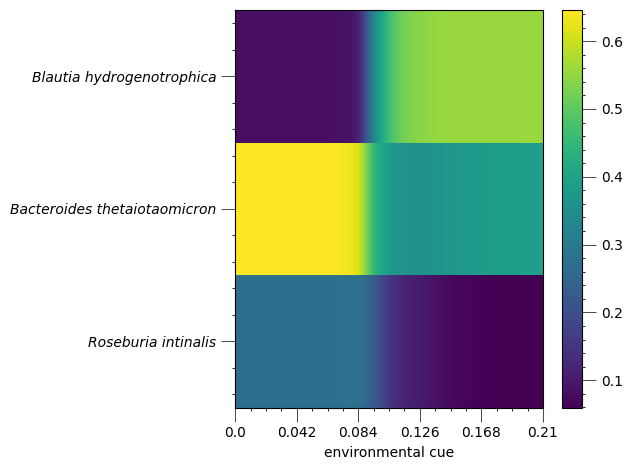

In [ ]:
########plot results################
ss = np.array(ss)
sum_ss = np.sum(ss,axis=1)
ss = np.array([ss[i]/sum_ss[i] for i in range(len(ss))])

mStates = ['Blautia hydrogenotrophica',
           'Bacteroides thetaiotaomicron',
           'Roseburia intinalis']
tp = np.linspace(0, simls,6 )


create_heatmap(ss.T,
               mStates,
               tp,
               np.round(np.linspace(0, 0.21, 6),3),
               'environmental cue',
               None,
               None,
               fileName = os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'phenomenological', 'environmtnCue.png'))

# Large community Simulation
Next we simulate a fifty-species community were a single bacterium switches phenotypes in response to an environmental cue. This alternative phenotype is strongly interacting with other species (higher average negative interactions). We keep the same parameters, but use stochastic ODEs to simulate different communities. Here we only perform 100 simulations instead of the 1000 simulations shown in the manuscript.

As before, we first import the necessary packages and scripts.

In [ ]:
from pathlib import Path
import os
import sys
import sdeint
from tqdm import tqdm
import numpy as np
from scipy.integrate import solve_ivp
from scipy.stats import beta
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from aquarel import load_theme

# Adjusting the import path
project_root = Path(os.getcwd()).parents[0]
sys.path.append(os.path.join(project_root, 'core'))
from phenomenologicalModelGeneric import *

# PCA setup
pca = PCA(n_components=2, whiten=1)

# Theme setup for plots
theme = load_theme("boxy_light")
theme.apply()

We write a function to generate a random vector of interactions, folowing a beta distribution.

In [ ]:
def get_interaction_v(N, a, b):
    """
    Generates interaction values using a beta distribution.
    """
    x = beta.rvs(a, b, size=N)
    #choice = np.random.choice(np.arange(N), size = int(N*.8), replace=False)
    #x[choice] = 0.0
    return 2 * x - 1


Next we write a function to generate random derivatives, with interations sampled from our previous function.

In [ ]:
def random_deriv_dict(N, a=50, b=51):
    """
    Creates a list of dictionaries representing derivative functions.
    """
    dicts = []
    for i in range(N):
        interactions = get_interaction_v(N, a, b)
        interactions[i] = -1
        dicts.append({
            'index': i,
            'growthRate': np.random.uniform(low = 0.1, high =1.3),
            'source': [],
            'sink': [],
            'interactions': interactions
        })
    return dicts

Next, we write the ODE function.

In [ ]:
def ode(N, t, epsilon, derivs):
    """
    Represents the Ordinary Differential Equation for the system.
    """
    derivatives = np.zeros(len(N))
    for i in range(len(N)):
        derivatives[i] = max(-N[i], derivs[i](N, epsilon))
    return derivatives


def get_ss(solObj):
    y = solObj.T
    sp1 = y[0] + y[1]
    #sp2 = y[2] + y[3]
    #sp3 = y[4] + y[5]

    v = [sp1[-1]]#, sp2[-1], sp3[-1]]


    for i in y[2::]:
        v.append(i[-1])

    return np.array(v)




We write diffusion functions for the stochastic ODE

In [ ]:
def diffusion(N, t, coeff):
    """
    Represents the diffusion component of the system with a given diffusion coefficient.
    """
    return np.diag(N * coeff)

def make_diffusion_function(coeff):
    """
    Creates a diffusion function with a fixed coefficient.
    """
    def diffusion_function(N, t):
        return diffusion(N, t, coeff)
    return diffusion_function

def close(func, *args):
    def newfunc(x, t):
        return func(x, t, *args)
    return newfunc

Next we write a simulation function that takes the community size ("N"), number of communities to simulation ("Nc"), the stregth of negative interactions ("negInt", the largest the strongest, starting from 51), the growth rate of the strongly interacting phenotype ("gr"), a diffusion coefficient ("diffusion_coef"), and suffix to save figures ("root").

In [ ]:
def main(N = 50,
         Nc = 1000,
         negInt1 = 75,
         gr = 0.3,
         diffusion_coeff = 0.2,
         root = None):



    derivDicts = random_deriv_dict(N)

    #hill functions of the strongly interactig species
    fxa_xb = get_hill(0.1, 10, 0.1, HillType.ACTIVATION)
    fxb_xa = get_hill(0.1, 10, 0.75, HillType.INHIBITION)


    d1 = derivDicts[0] #phenotype 1 of the strongly interacting species
    d2 = derivDicts[1] #phenotype 2 of the strongly interacting species

    #change the random species parameters

    #phenotype 1

    d1['growthRate'] = 0.1
    d1['source'] = [(1, fxb_xa)]
    d1['sink'] = [(0, fxa_xb)]
    d1['interactions'][1] = 0 #interaction from its other phenotype

    ssp = get_interaction_v(N, 50, negInt1) #generate random interactions with strength controlled by the "negInt1" parameter.
    ssp[0] = 0 #interaction with its other phenotype
    ssp[1] = -1 #self interaction

    #phenotype 2
    d2['growthRate'] = gr
    d2['source'] = [(0, fxa_xb)]
    d2['sink'] = [(1, fxb_xa)]

    derivDicts[0] = d1.copy()
    derivDicts[1] = d2.copy()

    #apply its interactions to the other species
    for i in range(len(ssp)):
        derivDicts[i]['interactions'][1] = ssp[i]


    #make derivatives
    derivs = [build_derivative(derivDicts[i]) for i in range(N)]


    envP = []
    ss = []



    while len(ss)<Nc:#simulate until number of communities is reached

        N0 = np.random.rand(N) * 0.1 #random initial conditions
        epsilon = np.random.uniform(low=0, high=0.25) #random environment cue
        args = (epsilon, derivs)
        current_diffusion = make_diffusion_function(diffusion_coeff)
        sol = sdeint.stratHeun(close(ode, *args), current_diffusion, N0, np.linspace(0, 100, 1000))


        fsol = get_ss(sol)

        if sum(np.isnan(fsol))==0: #in case there is a numerically stable result
            envP.append(epsilon)
            ss.append(fsol)

    #make the plots
    ss = np.array(ss)
    sorter = np.argsort(envP)
    plt.pcolormesh((ss[sorter]).T, cmap=cm.coolwarm)
    plt.colorbar(label='abundance')

    if root is not None:
        plt.tight_layout()
        plt.savefig(os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'phenomenological', 'heatMap_' + root + '.png'), transparent=True, dpi=600)
    plt.show()

    pc = pca.fit_transform(ss)
    explained_variance = pca.explained_variance_ratio_

    plt.scatter(pc.T[0], pc.T[1], s=10, c=envP, cmap=cm.coolwarm)
    plt.xlabel(f'PC1 ({explained_variance[0] * 100:.2f} %)', fontsize=16)
    plt.ylabel(f'PC2 ({explained_variance[1] * 100:.2f} %)', fontsize=16)
    plt.colorbar()
    if root is not None:
        plt.tight_layout()
        plt.savefig(os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'phenomenological', 'pca_' + root + '.png'), transparent=True, dpi=600)

    plt.show()

    sspA = get_interaction_v(10000, 50, 51)
    sspB = get_interaction_v(10000, 50, negInt1)

    plt.hist(sspA, bins=100, density=True, histtype='step', color='k')
    plt.hist(sspA, bins=100, density=True, histtype='bar', color='gray')
    plt.hist(sspB, bins=100, density=True, histtype='step', color='red')
    plt.hist(sspB, bins=100, density=True, histtype='bar', color='red', alpha=0.5)
    if root is not None:
        plt.tight_layout()
        plt.savefig(os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'phenomenological', 'dist_' + root + '.png'), transparent=True, dpi=600)
    plt.show()

    plt.scatter(envP, ss.T[0])
    plt.show()

    plt.hist(ss.T[0], density=True, histtype='step', color='red')
    plt.hist(ss.T[0], density=True, histtype='bar', color='red', alpha=0.5)



    if root is not None:
        plt.tight_layout()
        plt.savefig(os.path.join(Path(os.getcwd()).parents[1], 'files', 'Figures', 'phenomenological', 'bidist_' + root + '.png'), transparent=True, dpi=600)
    plt.show()

Next, we simulate the system with three different interactions strengths (from weak to strong), illustraded by the histograms.

In [ ]:
for i in tqdm(np.linspace(51,85, 3)):
    main(Nc=100, negInt1=i, gr=0.5, diffusion_coeff=0.20, root = 'NC_' + str(np.round(i)) + '_gr_0.5_DC_0.2')
